# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 2: Singapore Housing Modelling


## A. Introduction
The Housing Development Board (HDB) was setup to tackle the housing crisis in 1960s and now serves as the sole agency for public housing. HDB homes more than 80% of Singapore residents, across 24 towns and 3 estates. Key features of HDB’s public housing policy includes the sale of public houses to residents, but with a limited 99 year lease and it can be bought back by the government.

The Singapore Housing Dataset contains historical data related to resale transactions for Housing Development Board (HDB) flats that took place between the period of March 2012 to April 2021. 

Besides information on resale prices and transaction details, the dataset contains over 70 variables related to location and age of the units, their physical specifications, corresponding storey levels and dwelling mix within the flats, as well as the availability of various amenities (e.g. malls, hawkers, transport, schools).

## B. Problem Statement of Project
As property buyers in Singapore, the affordability of a HDB unit and potential factors that can influence the price are of interest because this can guide them in their planning process before making a purchase.

We make use of a regression model to give insights to prospective buyers on factors relating to the HDB unit that affect resale prices.

## C. Datasets
The following data sets will be used for the project obtained from [Kaggle](https://www.kaggle.com/competitions/dsi-sg-project-2-regression-challenge-hdb-price/data).
1. train.csv
    - contains variables ranging from housing specifications to amenities for 150,634 HDB flats from 2012 to 2021
2. test.csv
    - similar to train.csv, excluding the resale prices of the HDB 
    - contain details for 16,737 HDB  flats from 2012 to 2021


 ### Data dictionary:

 This data dictionary contains features that were engineered from the original dataset. Features not found here can be found in the original dataset using the link [here](https://www.kaggle.com/competitions/dsi-sg-project-2-regression-challenge-hdb-price/data).

|Feature|Type|Description|
|---|---|---|
|town_region|object|feature engineered by recategorizing "town" column - HDB township where the flat is located| 
|hdb_age_when_sold|int64|feature engineered by subtracting lease_commence_date from tranc_year|
|units_per_floor|float64|feature engineered by dividing total_dwelling_units by max_floor_lvl|
|has_rental|int32|feature engineered for boolean value if there is rental units in the same block
|standard_models|object|combination of flat models: standard, new generation, simplified, model A, model A2, improved, apartment, premium apartment|
|maisonette_models|object|combination of flat models: maisonette, improved-maisonette, model A maisonette, premium maisonette, premium apartment loft|
|private_design_models|object|combination of flat models: DBSS, type s1, type s2|

## D. Codes

### 1. Import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline


### 2. Data Cleaning and EDA

#### 2.1 Load the training and testing dataset for EDA.

In [2]:
train = pd.read_csv('data/train.csv')

/var/folders/fk/tl38z_650pnb8d8bzsdfs50h0000gn/T/ipykernel_32517/2263716369.py:1: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('data/train.csv')


#### 2.2 Descriptive Statistics:



In [3]:
train.describe()

id  floor_area_sqm  lease_commence_date  resale_price  \
count  150634.000000    150634.00000        150634.000000  1.506340e+05   
mean    93047.887496        97.19763          1992.448464  4.491615e+05   
std     53679.906247        24.40304            12.138829  1.433076e+05   
min         1.000000        31.00000          1966.000000  1.500000e+05   
25%     46469.250000        75.00000          1984.000000  3.470000e+05   
50%     93077.500000        95.00000          1992.000000  4.200000e+05   
75%    139574.750000       112.00000          2001.000000  5.200000e+05   
max    185966.000000       280.00000          2019.000000  1.258000e+06   

          Tranc_Year    Tranc_Month     mid_storey          lower  \
count  150634.000000  150634.000000  150634.000000  150634.000000   
mean     2016.489551       6.580500       8.284823       7.248370   
std         2.752396       3.345468       5.508074       5.515155   
min      2012.000000       1.000000       2.000000       1.000000   
25%      2014.000000       4.000000       5.000000       4.000000   
50%      2017.000000       7.000000       8.000000       7.000000   
75%      2019.000000       9.000000      11.000000      10.000000   
max      2021.000000      12.000000      50.000000      49.000000   

               upper            mid  ...  pri_sch_nearest_distance  \
count  150634.000000  150634.000000  ...             150634.000000   
mean        9.321275       8.284823  ...                395.172974   
std         5.507364       5.508074  ...                234.760931   
min         3.000000       2.000000  ...                 45.668324   
25%         6.000000       5.000000  ...                227.083163   
50%         9.000000       8.000000  ...                348.876691   
75%        12.000000      11.000000  ...                502.179385   
max        51.000000      50.000000  ...               3305.841039   

             vacancy  pri_sch_affiliation  pri_sch_latitude  \
count  150634.000000        150634.000000     150634.000000   
mean       55.368190             0.113195          1.366268   
std        17.903918             0.316832          0.042669   
min        20.000000             0.000000          1.274962   
25%        44.000000             0.000000          1.337289   
50%        54.000000             0.000000          1.364639   
75%        67.000000             0.000000          1.393910   
max       110.000000             1.000000          1.456667   

       pri_sch_longitude  sec_sch_nearest_dist   cutoff_point    affiliation  \
count      150634.000000         150634.000000  150634.000000  150634.000000   
mean          103.839106            508.533220     210.146428       0.031879   
std             0.072637            309.066265      20.010489       0.175677   
min           103.687724             38.913475     188.000000       0.000000   
25%           103.773754            290.285883     188.000000       0.000000   
50%           103.844210            447.377670     208.000000       0.000000   
75%           103.898773            644.284099     224.000000       0.000000   
max           103.962919           3638.977233     260.000000       1.000000   

       sec_sch_latitude  sec_sch_longitude  
count     150634.000000      150634.000000  
mean           1.365986         103.839340  
std            0.042599           0.072630  
min            1.276029         103.687207  
25%            1.337545         103.776008  
50%            1.366132         103.842719  
75%            1.391781         103.899872  
max            1.453280         103.961105  

[8 rows x 57 columns]

#### 2.3 Data Visualization, Analysing Relationships between Variables and Handling Missing Data:

##### 2.31 : Visualisation

We use .info() to first view the dtypes and other data for the columns.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

In [5]:
#changing all heading to lowercase
train = train.rename(columns=str.lower)

##### 2.32 : Missing Data
Based on DType warning for column 41 when the data set was loaded, there was indication that the column contains issues in some of the values (as a mixed data type). Upon investigation, there were missing postal codes found for 2 different addresses as stated below. 

We fill in the missing postal codes in the following cell.

In [6]:
# filling in missing postal codes for two addresses in the data set
train.loc[train['address'] == '215, CHOA CHU KANG CTRL', 'postal'] = '680215'
train.loc[train['address'] == '238, COMPASSVALE WALK', 'postal'] = '540238'

In [7]:
train.head()

id tranc_yearmonth             town  flat_type block       street_name  \
0   88471         2016-05  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD   
1  122598         2012-07           BISHAN     5 ROOM   153      BISHAN ST 13   
2  170897         2013-07      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   
3   86070         2012-04           BISHAN     4 ROOM   232      BISHAN ST 22   
4  153632         2017-12           YISHUN     4 ROOM   876      YISHUN ST 81   

  storey_range  floor_area_sqm  flat_model  lease_commence_date  ...  vacancy  \
0     10 TO 12            90.0     Model A                 2006  ...       78   
1     07 TO 09           130.0    Improved                 1987  ...       45   
2     13 TO 15           144.0   Apartment                 1997  ...       39   
3     01 TO 05           103.0     Model A                 1992  ...       20   
4     01 TO 03            83.0  Simplified                 1987  ...       74   

   pri_sch_affiliation  pri_sch_latitude  pri_sch_longitude  \
0                    1          1.317659         103.882504   
1                    1          1.349783         103.854529   
2                    0          1.345245         103.756265   
3                    1          1.354789         103.844934   
4                    0          1.416280         103.838798   

   sec_sch_nearest_dist                             sec_sch_name  \
0           1138.633422                 Geylang Methodist School   
1            447.894399  Kuo Chuan Presbyterian Secondary School   
2            180.074558             Yusof Ishak Secondary School   
3            389.515528                     Catholic High School   
4            312.025435             Orchid Park Secondary School   

   cutoff_point affiliation sec_sch_latitude  sec_sch_longitude  
0           224           0         1.317659         103.882504  
1           232           0         1.350110         103.854892  
2           188           0         1.342334         103.760013  
3           253           1         1.354789         103.844934  
4           208           0         1.414888         103.838335  

[5 rows x 77 columns]

##### 2.33 : Analysing Relationships between Variables

We use a heat map to ensure the reliability of our model by avoiding multicollinearity through the removal of variables that are highly correlated.

We first plot a preliminary heat map to view how the numeric variables in the dataframe correlate to one another.

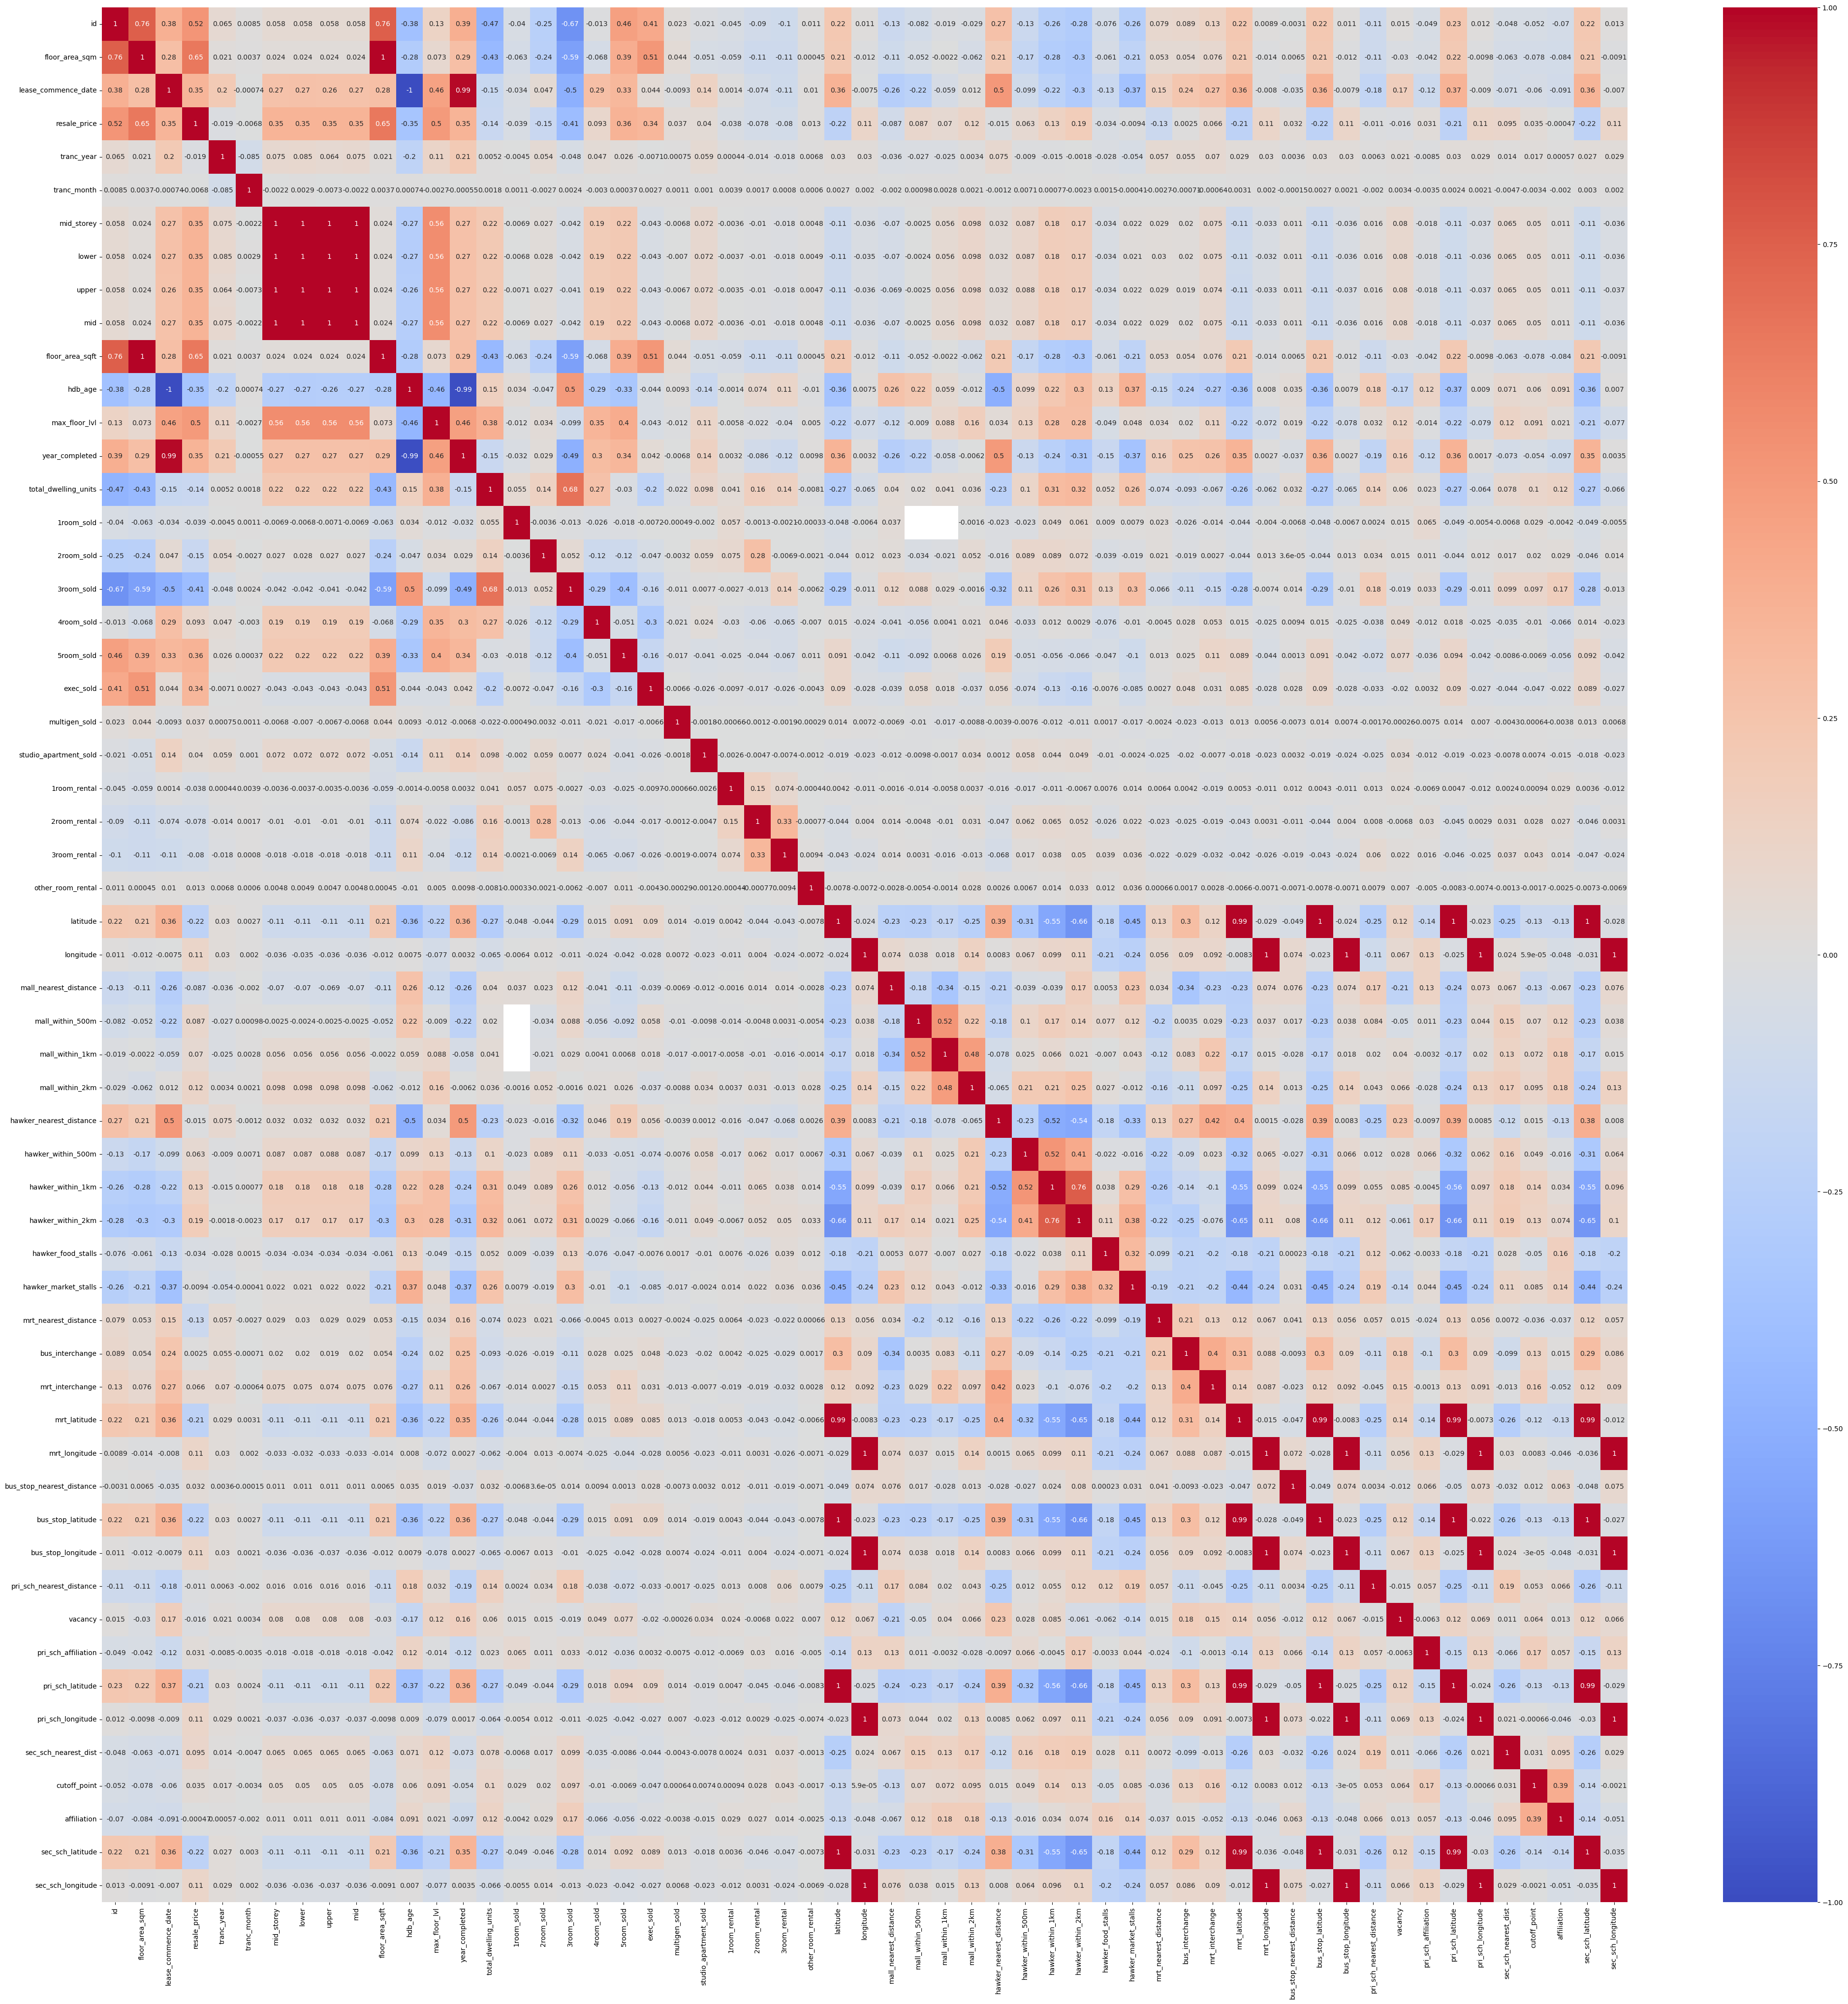

In [8]:
# seaborn heatmap visualization of pearson correlation coefficients between numeric variables in our dataframe
plt.figure(figsize=(50,50))

numeric_data = train.apply(pd.to_numeric,errors = 'coerce')
numeric_data = train.select_dtypes(include='number')

sns.heatmap(numeric_data.corr(),  annot=True, cmap='coolwarm')
plt.show()

There are several columns that can be dropped from the data set as they are highly correlated with another. We use a threshold of 0.7 to decide on the columns to drop.

After each set of dropping columns, we plot another heat map to see how the values change as the columns are removed.

Main reasons to consider for dropping columns:
* repeated information (e.g. there is no need to have 3 different ways of representing the location of a flat or the flat model)
* redundant information (e.g. bus stop name, residential)

In [9]:
#viewing all the columns in the data set
train.columns

Index(['id', 'tranc_yearmonth', 'town', 'flat_type', 'block', 'street_name',
       'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'resale_price', 'tranc_year', 'tranc_month', 'mid_storey', 'lower',
       'upper', 'mid', 'full_flat_type', 'address', 'floor_area_sqft',
       'hdb_age', 'max_floor_lvl', 'year_completed', 'residential',
       'commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion', 'total_dwelling_units', '1room_sold', '2room_sold',
       '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'postal', 'latitude', 'longitude', 'planning_area',
       'mall_nearest_distance', 'mall_within_500m', 'mall_within_1km',
       'mall_within_2km', 'hawker_nearest_distance', 'hawker_within_500m',
       'hawker_within_1km', 'hawker_within_2km', 'hawker_food_stalls',
       'hawker_market_stalls', 'mr

For age of the flat, the data provided does not accurately show the age of the flat when it is sold. Therefore, we compute the age of the HDB flat when it was sold (hdb_age_when_sold).

We can drop all other columns that refer to the age of the flat and use hdb_age_when_sold, tranc_year and tranc_month.

In [10]:
# create new column for hdb_age_when_sold
# this is to show the remaining years left on the lease as of the year transacted
hdb_age_when_sold = train["tranc_year"] - train["lease_commence_date"]
train.insert(loc = 9, column = "hdb_age_when_sold", value = hdb_age_when_sold)

In [11]:
# drop all other columns for age of the flat that will no longer be used
train.drop(columns=['tranc_yearmonth', 'lease_commence_date', 'year_completed', 'hdb_age'],
       inplace=True)

Besides the latitude and longitude, there are many ways in which the data set represents the location of the flat:

* town: HDB township where the flat is located, e.g. BUKIT MERAH
* block: block number of the resale flat, e.g. 454
* street_name: street name where the resale flat resides, e.g. TAMPINES ST 42
* address: combination of block and street_name
* postal: postal code of the resale flat block
* planning_area: Government planning area that the flat is located*

We remove block, street_name and address as individually, they are too specific to the block and too complex to use for analysis. 

Instead, we decide between town, postal or planning_area. 

We decide to remove planning_area and postal for a couple of reasons:
* It is mainly used by URA and / or SingPost for land planning and other purposes.
* Upon further research, it does not seem to tally with HDB township. For example, some areas in Marine Parade are classified under the URA planning area for Bedok. From a buyer's perspective, this might not be too accurate.

We are left with town for analysis.

In [12]:
#dropping the all except town for location pinpointing
train.drop(columns=['block', 'street_name', 'address', 'planning_area','postal'], 
       inplace=True)

In [13]:
# drop the columns with latitudes and longitudes
train.drop(columns=['latitude', 'longitude', 'mrt_latitude', 'mrt_longitude', 'bus_stop_latitude',
       'bus_stop_longitude', 'pri_sch_latitude', 'pri_sch_longitude', 'sec_sch_latitude', 'sec_sch_longitude'], 
       inplace=True)

Next we look at the columns that refer to the floor or storey that the flat is located. 

* storey_range: floor level (range) of the resale flat unit, e.g. 07 TO 09
* mid_storey: median value of storey_range
* lower: lower value of storey_range
* upper: upper value of storey_range
* mid: middle value of storey_range
* max_floor_lvl: highest floor of the resale flat

We do not need all of the above, so we can drop all except one. There is also evidence of collinearity in the heat map, which solidifies our decision to drop them.

In [14]:
# keep mid_storey to represent the location of the flat in the block of flats
train.drop(columns=['storey_range','lower','upper','mid'], 
       inplace=True)

For the unit specifications, there are 5 features provided.

* flat_type: type of the resale flat unit, e.g. 3 ROOM
* flat_model: HDB model of the resale flat, e.g. Multi Generation
* full_flat_type: combination of flat_type and flat_model
* floor_area_sqm: floor area of the resale flat unit in square metres
* floor_area_sqft: floor area of the resale flat unit in square feet

There are two columns that refer to the size (area) of the flat. We keep sqft instead of sqm as it is more commonly used when referring to size of a flat.

We keep flat_type and flat_model for processing as it allows us to process them individually to see how the price is affected by each (rather than a combination of the two).

In [15]:
# drop full flat type and sqm
train.drop(columns=['floor_area_sqm', 'full_flat_type'], 
       inplace=True)

For the dwelling mix, we keep the total_dwelling_units as opposed to the numbers of the individual units for each type of flat. We will look more into this column in the feature engineering section.

For rental flats, we drop the variables and instead create a boolean variable called has_rental to indicate whether the block of flats contain any type of rental flat. There are two reasons for this:
1. type of rental flats in a block of flats is not available as public information. This means that there isn't a high likelihood that these individually would be a key factor in the sale of resale flats.
2. The presence of rental flats in the block is public information. This might be a factor in the purchase of a resale flat. 

In [16]:
# compute new boolean column for whether flat has rental units
train['has_rental'] = (train[['1room_rental', '2room_rental', '3room_rental', 'other_room_rental']].sum(axis=1) > 0).astype(int) 

In [17]:
# drop all sold and all rental columns (except the new has_rental column)
train.drop(columns=['1room_sold','2room_sold','3room_sold','4room_sold','5room_sold','exec_sold','multigen_sold','studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental', 'other_room_rental'], 
       inplace=True)
train.insert(16, 'has_rental', train.pop('has_rental'))
pd.set_option('display.max_columns', 500)
train.head()

id             town  flat_type  flat_model  hdb_age_when_sold  \
0   88471  KALLANG/WHAMPOA     4 ROOM     Model A                 10   
1  122598           BISHAN     5 ROOM    Improved                 25   
2  170897      BUKIT BATOK  EXECUTIVE   Apartment                 16   
3   86070           BISHAN     4 ROOM     Model A                 20   
4  153632           YISHUN     4 ROOM  Simplified                 30   

   resale_price  tranc_year  tranc_month  mid_storey  floor_area_sqft  \
0      680000.0        2016            5          11          968.760   
1      665000.0        2012            7           8         1399.320   
2      838000.0        2013            7          14         1550.016   
3      550000.0        2012            4           3         1108.692   
4      298000.0        2017           12           2          893.412   

   max_floor_lvl residential commercial market_hawker multistorey_carpark  \
0             25           Y          N             N                   N   
1              9           Y          N             N                   N   
2             16           Y          N             N                   N   
3             11           Y          Y             N                   N   
4              4           Y          N             N                   N   

  precinct_pavilion  has_rental  total_dwelling_units  mall_nearest_distance  \
0                 N           0                   142            1094.090418   
1                 N           0                   112             866.941448   
2                 N           0                    90            1459.579948   
3                 N           0                    75             950.175199   
4                 N           0                    48             729.771895   

   mall_within_500m  mall_within_1km  mall_within_2km  \
0               NaN              NaN              7.0   
1               NaN              1.0              3.0   
2               NaN              NaN              4.0   
3               NaN              1.0              4.0   
4               NaN              1.0              2.0   

   hawker_nearest_distance  hawker_within_500m  hawker_within_1km  \
0               154.753357                 1.0                3.0   
1               640.151925                 NaN                1.0   
2              1762.082341                 NaN                NaN   
3               726.215262                 NaN                1.0   
4              1540.151439                 NaN                NaN   

   hawker_within_2km  hawker_food_stalls  hawker_market_stalls  \
0               13.0                  84                    60   
1                7.0                  80                    77   
2                1.0                  84                    95   
3                9.0                  32                    86   
4                1.0                  45                     0   

   mrt_nearest_distance     mrt_name  bus_interchange  mrt_interchange  \
0            330.083069      Kallang                0                0   
1            903.659703       Bishan                1                1   
2           1334.251197  Bukit Batok                1                0   
3            907.453484       Bishan                1                1   
4            412.343032       Khatib                0                0   

   bus_stop_nearest_distance             bus_stop_name  \
0                  29.427395                    Blk 3B   
1                  58.207761              BLK 151A MKT   
2                 214.747860                  Blk 289E   
3                  43.396521  Opp Bishan Nth Shop Mall   
4                 129.422752                   Blk 873   

   pri_sch_nearest_distance                           pri_sch_name  vacancy  \
0               1138.633422               Geylang Methodist School       78   
1                415.607357  Kuo Chuan Presbyterian Primary School       45   
2    

At this juncture, we can run the heat map again to see if there are any changes in the collinearity before we make more changes to the data frame.

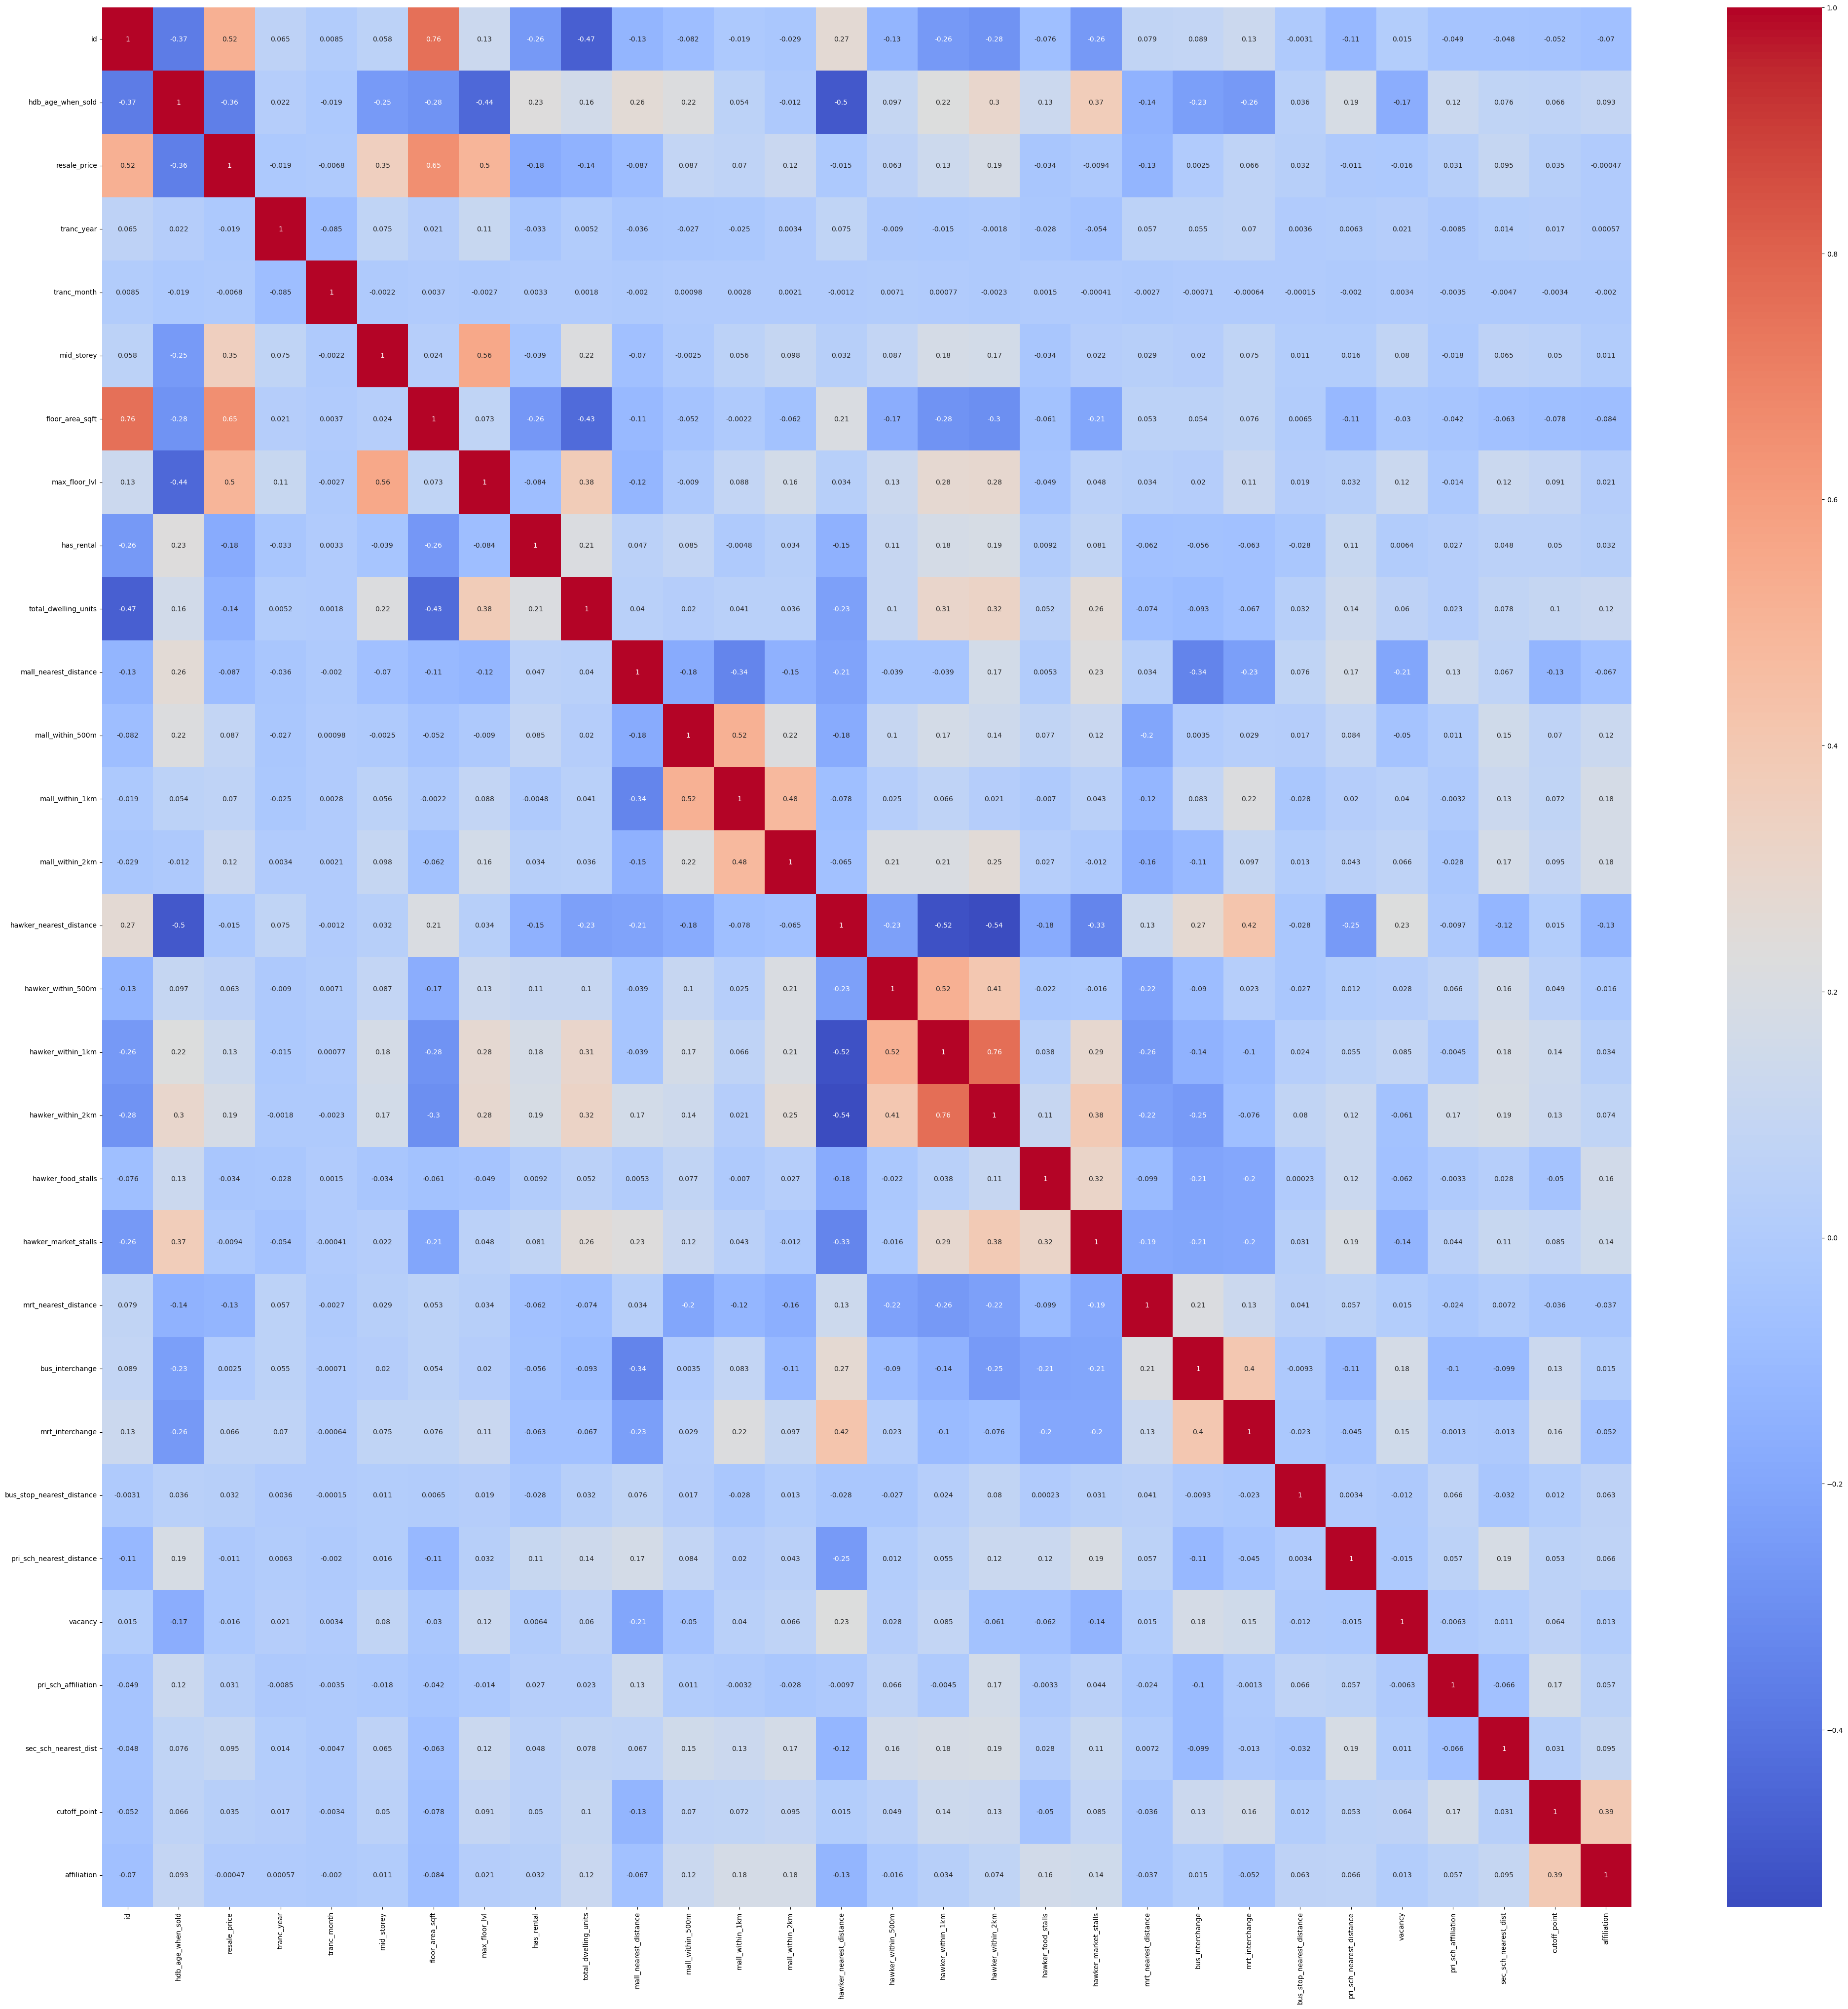

In [18]:
# seaborn heatmap visualization of pearson correlation coefficients between numeric variables in our dataframe
plt.figure(figsize=(50,50))

numeric_data = train.apply(pd.to_numeric,errors = 'coerce')
numeric_data = train.select_dtypes(include='number')

sns.heatmap(numeric_data.corr(),  annot=True, cmap='coolwarm')
plt.show()

Analysis of the heatmap:

The presence of the white cells, and also cells that are above 0.7 threshold (indicating multicollinearity), means we need to continue with analysing and possibly dropping some cells to reduce and remove these incidences.

In [19]:
train.columns

Index(['id', 'town', 'flat_type', 'flat_model', 'hdb_age_when_sold',
       'resale_price', 'tranc_year', 'tranc_month', 'mid_storey',
       'floor_area_sqft', 'max_floor_lvl', 'residential', 'commercial',
       'market_hawker', 'multistorey_carpark', 'precinct_pavilion',
       'has_rental', 'total_dwelling_units', 'mall_nearest_distance',
       'mall_within_500m', 'mall_within_1km', 'mall_within_2km',
       'hawker_nearest_distance', 'hawker_within_500m', 'hawker_within_1km',
       'hawker_within_2km', 'hawker_food_stalls', 'hawker_market_stalls',
       'mrt_nearest_distance', 'mrt_name', 'bus_interchange',
       'mrt_interchange', 'bus_stop_nearest_distance', 'bus_stop_name',
       'pri_sch_nearest_distance', 'pri_sch_name', 'vacancy',
       'pri_sch_affiliation', 'sec_sch_nearest_dist', 'sec_sch_name',
       'cutoff_point', 'affiliation'],
      dtype='object')

Next we look at the amenities.

For general amenities, we keep all columns except the following:
* residential: boolean value if resale flat has residential units in the same block

Since all the rows are describing a HDB block of flats which are all residential blocks, this column will have no bearing on the data.

In [20]:
# drop residential
train.drop(columns=['residential'], 
       inplace=True)

For columns referring to hawkers and malls, we look at the heat map and we see that there are some values that still seem to be having some colinearity between one another.

These seem to be more prevalent for the hawkers and malls that are within 500 m and 1 km. Since these would be subsumed under the 2km column, we can drop these two types of columns. 

We also drop the market_hawker column as does not add value to the analysis.

In [21]:
# dropping columns for hawker and malls
train.drop(columns=['mall_within_500m', 'mall_within_1km', 'hawker_within_500m', 'hawker_within_1km', 'market_hawker'],
       inplace=True)

The MRT, bus and schools columns are generally doing well on the heat map. 

However, it might not be useful to keep certain columns for analysis (e.g. name of bus stop or schools)

We also drop all other naming columns (e.g. id) to reduce the noise in the models.

In [22]:
# dropping all other irrelevant columns
train.drop(columns=['id', 'mrt_name', 'bus_stop_name', 'pri_sch_name', 'sec_sch_name'],
       inplace=True)

We run .info() and plot the heat map again.

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   town                       150634 non-null  object 
 1   flat_type                  150634 non-null  object 
 2   flat_model                 150634 non-null  object 
 3   hdb_age_when_sold          150634 non-null  int64  
 4   resale_price               150634 non-null  float64
 5   tranc_year                 150634 non-null  int64  
 6   tranc_month                150634 non-null  int64  
 7   mid_storey                 150634 non-null  int64  
 8   floor_area_sqft            150634 non-null  float64
 9   max_floor_lvl              150634 non-null  int64  
 10  commercial                 150634 non-null  object 
 11  multistorey_carpark        150634 non-null  object 
 12  precinct_pavilion          150634 non-null  object 
 13  has_rental                 15

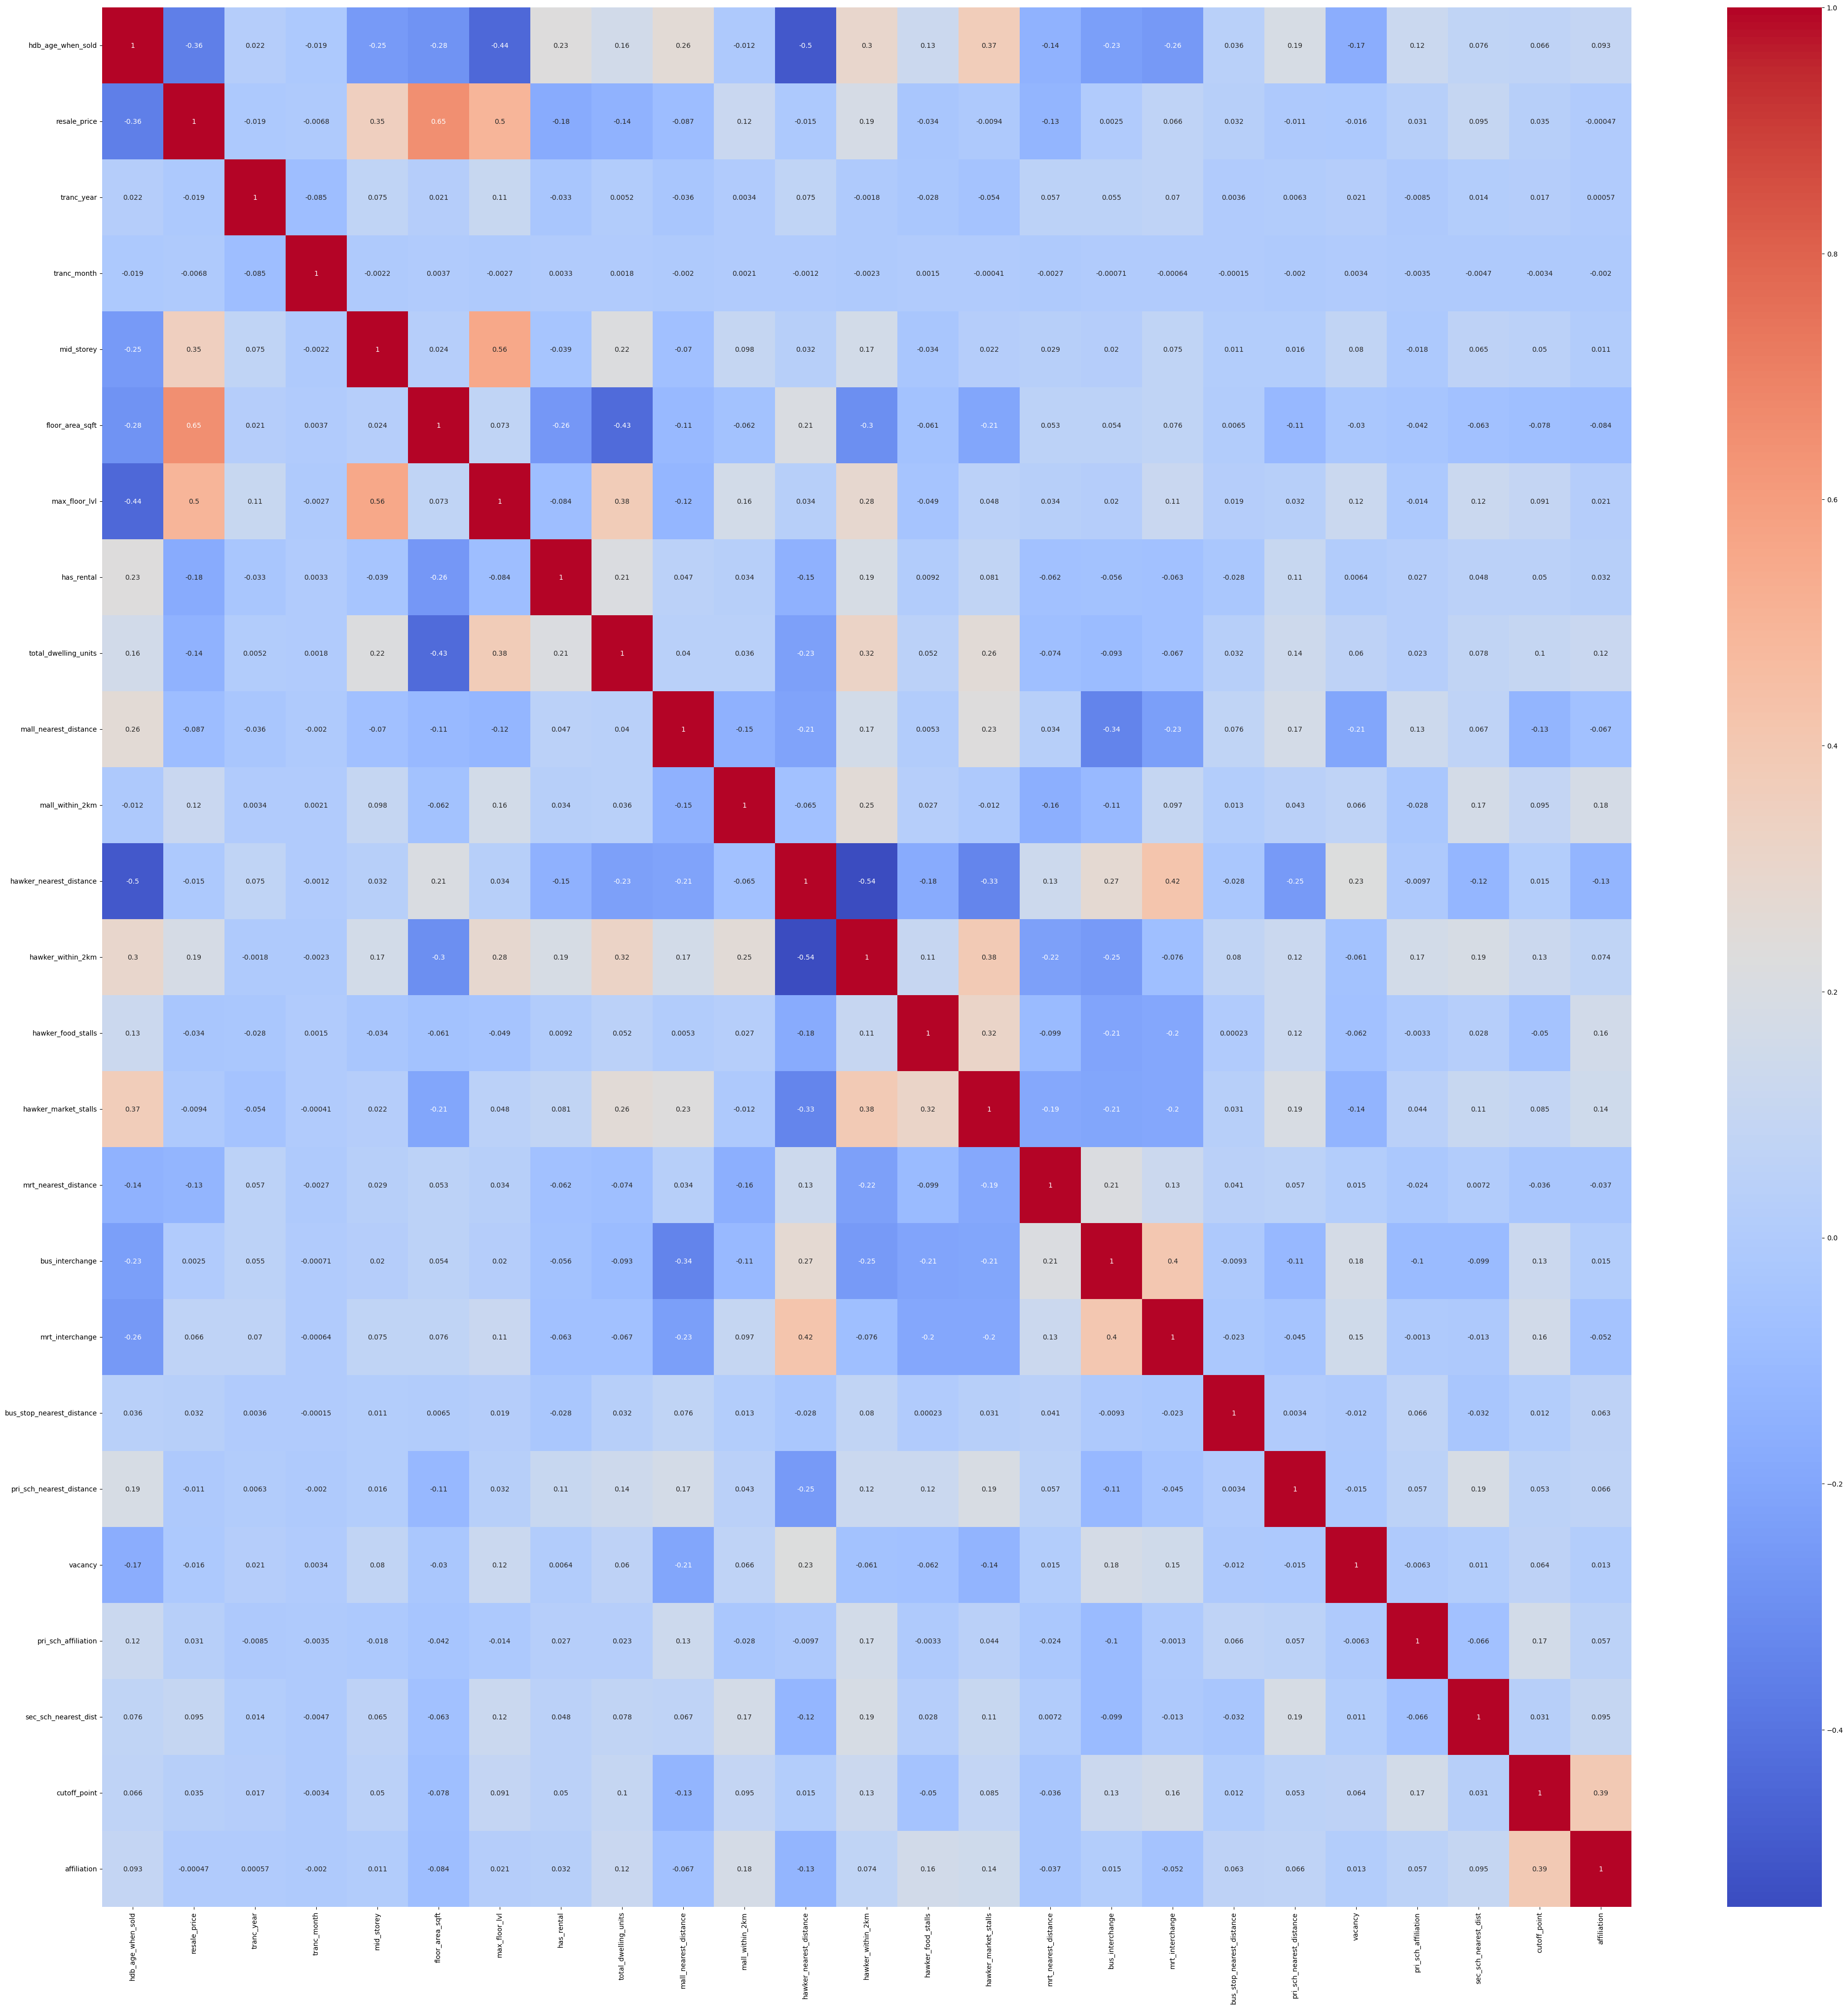

In [24]:
# seaborn heatmap visualization of pearson correlation coefficients between numeric variables in our dataframe
plt.figure(figsize=(50,50))

numeric_data = train.apply(pd.to_numeric,errors = 'coerce')
numeric_data = train.select_dtypes(include='number')

sns.heatmap(numeric_data.corr(),  annot=True, cmap='coolwarm')
plt.show()

Some rows indicate null values in the above cell. We use isna() and sort() to sieve out the rows with missing values and address them by filling with NAN.

In [25]:
pd.set_option('display.max_rows', 500)
train.isna().sum().sort_values()

town                             0
sec_sch_nearest_dist             0
pri_sch_affiliation              0
vacancy                          0
pri_sch_nearest_distance         0
bus_stop_nearest_distance        0
mrt_interchange                  0
bus_interchange                  0
mrt_nearest_distance             0
hawker_market_stalls             0
hawker_food_stalls               0
hawker_nearest_distance          0
cutoff_point                     0
total_dwelling_units             0
affiliation                      0
precinct_pavilion                0
multistorey_carpark              0
commercial                       0
max_floor_lvl                    0
floor_area_sqft                  0
mid_storey                       0
tranc_month                      0
tranc_year                       0
resale_price                     0
hdb_age_when_sold                0
flat_model                       0
flat_type                        0
has_rental                       0
mall_nearest_distanc

As seen in the previous cell, there are some null values in three of the columns. We use fillna to fill the nan values with 0.

We drop the missing values for mall_nearest_distance as there is no indication as to where the nearest mall might be. 

Comparatively, for the other two variables, we fill the values with '0' as they belong to a boolean column.

In [26]:
train['mall_within_2km'] = train['mall_within_2km'].fillna(value=0)
train['hawker_within_2km'] = train['hawker_within_2km'].fillna(value=0)


In [27]:
train.dropna(subset = ['mall_nearest_distance'], inplace=True)

We now check to confirm that there are no more null values in the above columns.

In [28]:
train.isna().sum().sort_values()

town                         0
sec_sch_nearest_dist         0
pri_sch_affiliation          0
vacancy                      0
pri_sch_nearest_distance     0
bus_stop_nearest_distance    0
mrt_interchange              0
bus_interchange              0
mrt_nearest_distance         0
hawker_market_stalls         0
hawker_food_stalls           0
hawker_within_2km            0
hawker_nearest_distance      0
mall_within_2km              0
cutoff_point                 0
mall_nearest_distance        0
has_rental                   0
precinct_pavilion            0
multistorey_carpark          0
commercial                   0
max_floor_lvl                0
floor_area_sqft              0
mid_storey                   0
tranc_month                  0
tranc_year                   0
resale_price                 0
hdb_age_when_sold            0
flat_model                   0
flat_type                    0
total_dwelling_units         0
affiliation                  0
dtype: int64

Next, we use .info() to check that our columns are of the appropriate data types.

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149805 entries, 0 to 150633
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   town                       149805 non-null  object 
 1   flat_type                  149805 non-null  object 
 2   flat_model                 149805 non-null  object 
 3   hdb_age_when_sold          149805 non-null  int64  
 4   resale_price               149805 non-null  float64
 5   tranc_year                 149805 non-null  int64  
 6   tranc_month                149805 non-null  int64  
 7   mid_storey                 149805 non-null  int64  
 8   floor_area_sqft            149805 non-null  float64
 9   max_floor_lvl              149805 non-null  int64  
 10  commercial                 149805 non-null  object 
 11  multistorey_carpark        149805 non-null  object 
 12  precinct_pavilion          149805 non-null  object 
 13  has_rental                 149805 

Based on the above cell, the following data types are not suitable and need to be reassigned:

* tranc_month: int to object
    * for the purposes of dummifying the column.
* commercial, multistorey_carpark, precinct_pavilion: object to boolean (1/0)
    * As indicated in the data dictionary on Kaggle, these columns are meant to be boolean.

In [30]:
train.head()

town  flat_type  flat_model  hdb_age_when_sold  resale_price  \
0  KALLANG/WHAMPOA     4 ROOM     Model A                 10      680000.0   
1           BISHAN     5 ROOM    Improved                 25      665000.0   
2      BUKIT BATOK  EXECUTIVE   Apartment                 16      838000.0   
3           BISHAN     4 ROOM     Model A                 20      550000.0   
4           YISHUN     4 ROOM  Simplified                 30      298000.0   

   tranc_year  tranc_month  mid_storey  floor_area_sqft  max_floor_lvl  \
0        2016            5          11          968.760             25   
1        2012            7           8         1399.320              9   
2        2013            7          14         1550.016             16   
3        2012            4           3         1108.692             11   
4        2017           12           2          893.412              4   

  commercial multistorey_carpark precinct_pavilion  has_rental  \
0          N                   N                 N           0   
1          N                   N                 N           0   
2          N                   N                 N           0   
3          Y                   N                 N           0   
4          N                   N                 N           0   

   total_dwelling_units  mall_nearest_distance  mall_within_2km  \
0                   142            1094.090418              7.0   
1                   112             866.941448              3.0   
2                    90            1459.579948              4.0   
3                    75             950.175199              4.0   
4                    48             729.771895              2.0   

   hawker_nearest_distance  hawker_within_2km  hawker_food_stalls  \
0               154.753357               13.0                  84   
1               640.151925                7.0                  80   
2              1762.082341                1.0                  84   
3               726.215262                9.0                  32   
4              1540.151439                1.0                  45   

   hawker_market_stalls  mrt_nearest_distance  bus_interchange  \
0                    60            330.083069                0   
1                    77            903.659703                1   
2                    95           1334.251197                1   
3                    86            907.453484                1   
4                     0            412.343032                0   

   mrt_interchange  bus_stop_nearest_distance  pri_sch_nearest_distance  \
0                0                  29.427395               1138.633422   
1                1                  58.207761                415.607357   
2                0                 214.747860                498.849039   
3                1                  43.396521                389.515528   
4                0                 129.422752                401.200584   

   vacancy  pri_sch_affiliation  sec_sch_nearest_dist  cutoff_point  \
0       78                    1           1138.633422           224   
1       45                    1            447.894399           232   
2       39                    0            180.074558           188   
3       20                    1            389.515528           253   
4       74                    0            312.025435           208   

   affiliation  
0            0  
1            0  
2            0  
3            1  
4            0

In [31]:
#changing type from int to object
train['tranc_month'] = train['tranc_month'].astype(object)

#changing type from object to bool
train['commercial'] = train['commercial'].map({'Y': 1, 'N': 0})
train['multistorey_carpark'] = train['multistorey_carpark'].map({'Y': 1, 'N': 0})
train['precinct_pavilion'] = train['precinct_pavilion'].map({'Y': 1, 'N': 0})


In [32]:
train.head()

town  flat_type  flat_model  hdb_age_when_sold  resale_price  \
0  KALLANG/WHAMPOA     4 ROOM     Model A                 10      680000.0   
1           BISHAN     5 ROOM    Improved                 25      665000.0   
2      BUKIT BATOK  EXECUTIVE   Apartment                 16      838000.0   
3           BISHAN     4 ROOM     Model A                 20      550000.0   
4           YISHUN     4 ROOM  Simplified                 30      298000.0   

   tranc_year tranc_month  mid_storey  floor_area_sqft  max_floor_lvl  \
0        2016           5          11          968.760             25   
1        2012           7           8         1399.320              9   
2        2013           7          14         1550.016             16   
3        2012           4           3         1108.692             11   
4        2017          12           2          893.412              4   

   commercial  multistorey_carpark  precinct_pavilion  has_rental  \
0           0                    0                  0           0   
1           0                    0                  0           0   
2           0                    0                  0           0   
3           1                    0                  0           0   
4           0                    0                  0           0   

   total_dwelling_units  mall_nearest_distance  mall_within_2km  \
0                   142            1094.090418              7.0   
1                   112             866.941448              3.0   
2                    90            1459.579948              4.0   
3                    75             950.175199              4.0   
4                    48             729.771895              2.0   

   hawker_nearest_distance  hawker_within_2km  hawker_food_stalls  \
0               154.753357               13.0                  84   
1               640.151925                7.0                  80   
2              1762.082341                1.0                  84   
3               726.215262                9.0                  32   
4              1540.151439                1.0                  45   

   hawker_market_stalls  mrt_nearest_distance  bus_interchange  \
0                    60            330.083069                0   
1                    77            903.659703                1   
2                    95           1334.251197                1   
3                    86            907.453484                1   
4                     0            412.343032                0   

   mrt_interchange  bus_stop_nearest_distance  pri_sch_nearest_distance  \
0                0                  29.427395               1138.633422   
1                1                  58.207761                415.607357   
2                0                 214.747860                498.849039   
3                1                  43.396521                389.515528   
4                0                 129.422752                401.200584   

   vacancy  pri_sch_affiliation  sec_sch_nearest_dist  cutoff_point  \
0       78                    1           1138.633422           224   
1       45                    1            447.894399           232   
2       39                    0            180.074558           188   
3       20                    1            389.515528           253   
4       74                    0            312.025435           208   

   affiliation  
0            0  
1            0  
2            0  
3            1  
4            0

Doing one last quick check using .info() to ensure that the data types are accurate before proceeding.

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149805 entries, 0 to 150633
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   town                       149805 non-null  object 
 1   flat_type                  149805 non-null  object 
 2   flat_model                 149805 non-null  object 
 3   hdb_age_when_sold          149805 non-null  int64  
 4   resale_price               149805 non-null  float64
 5   tranc_year                 149805 non-null  int64  
 6   tranc_month                149805 non-null  object 
 7   mid_storey                 149805 non-null  int64  
 8   floor_area_sqft            149805 non-null  float64
 9   max_floor_lvl              149805 non-null  int64  
 10  commercial                 149805 non-null  int64  
 11  multistorey_carpark        149805 non-null  int64  
 12  precinct_pavilion          149805 non-null  int64  
 13  has_rental                 149805 

Plotting a final heat map to ensure that the variables are performing below the set threshold of 0.7

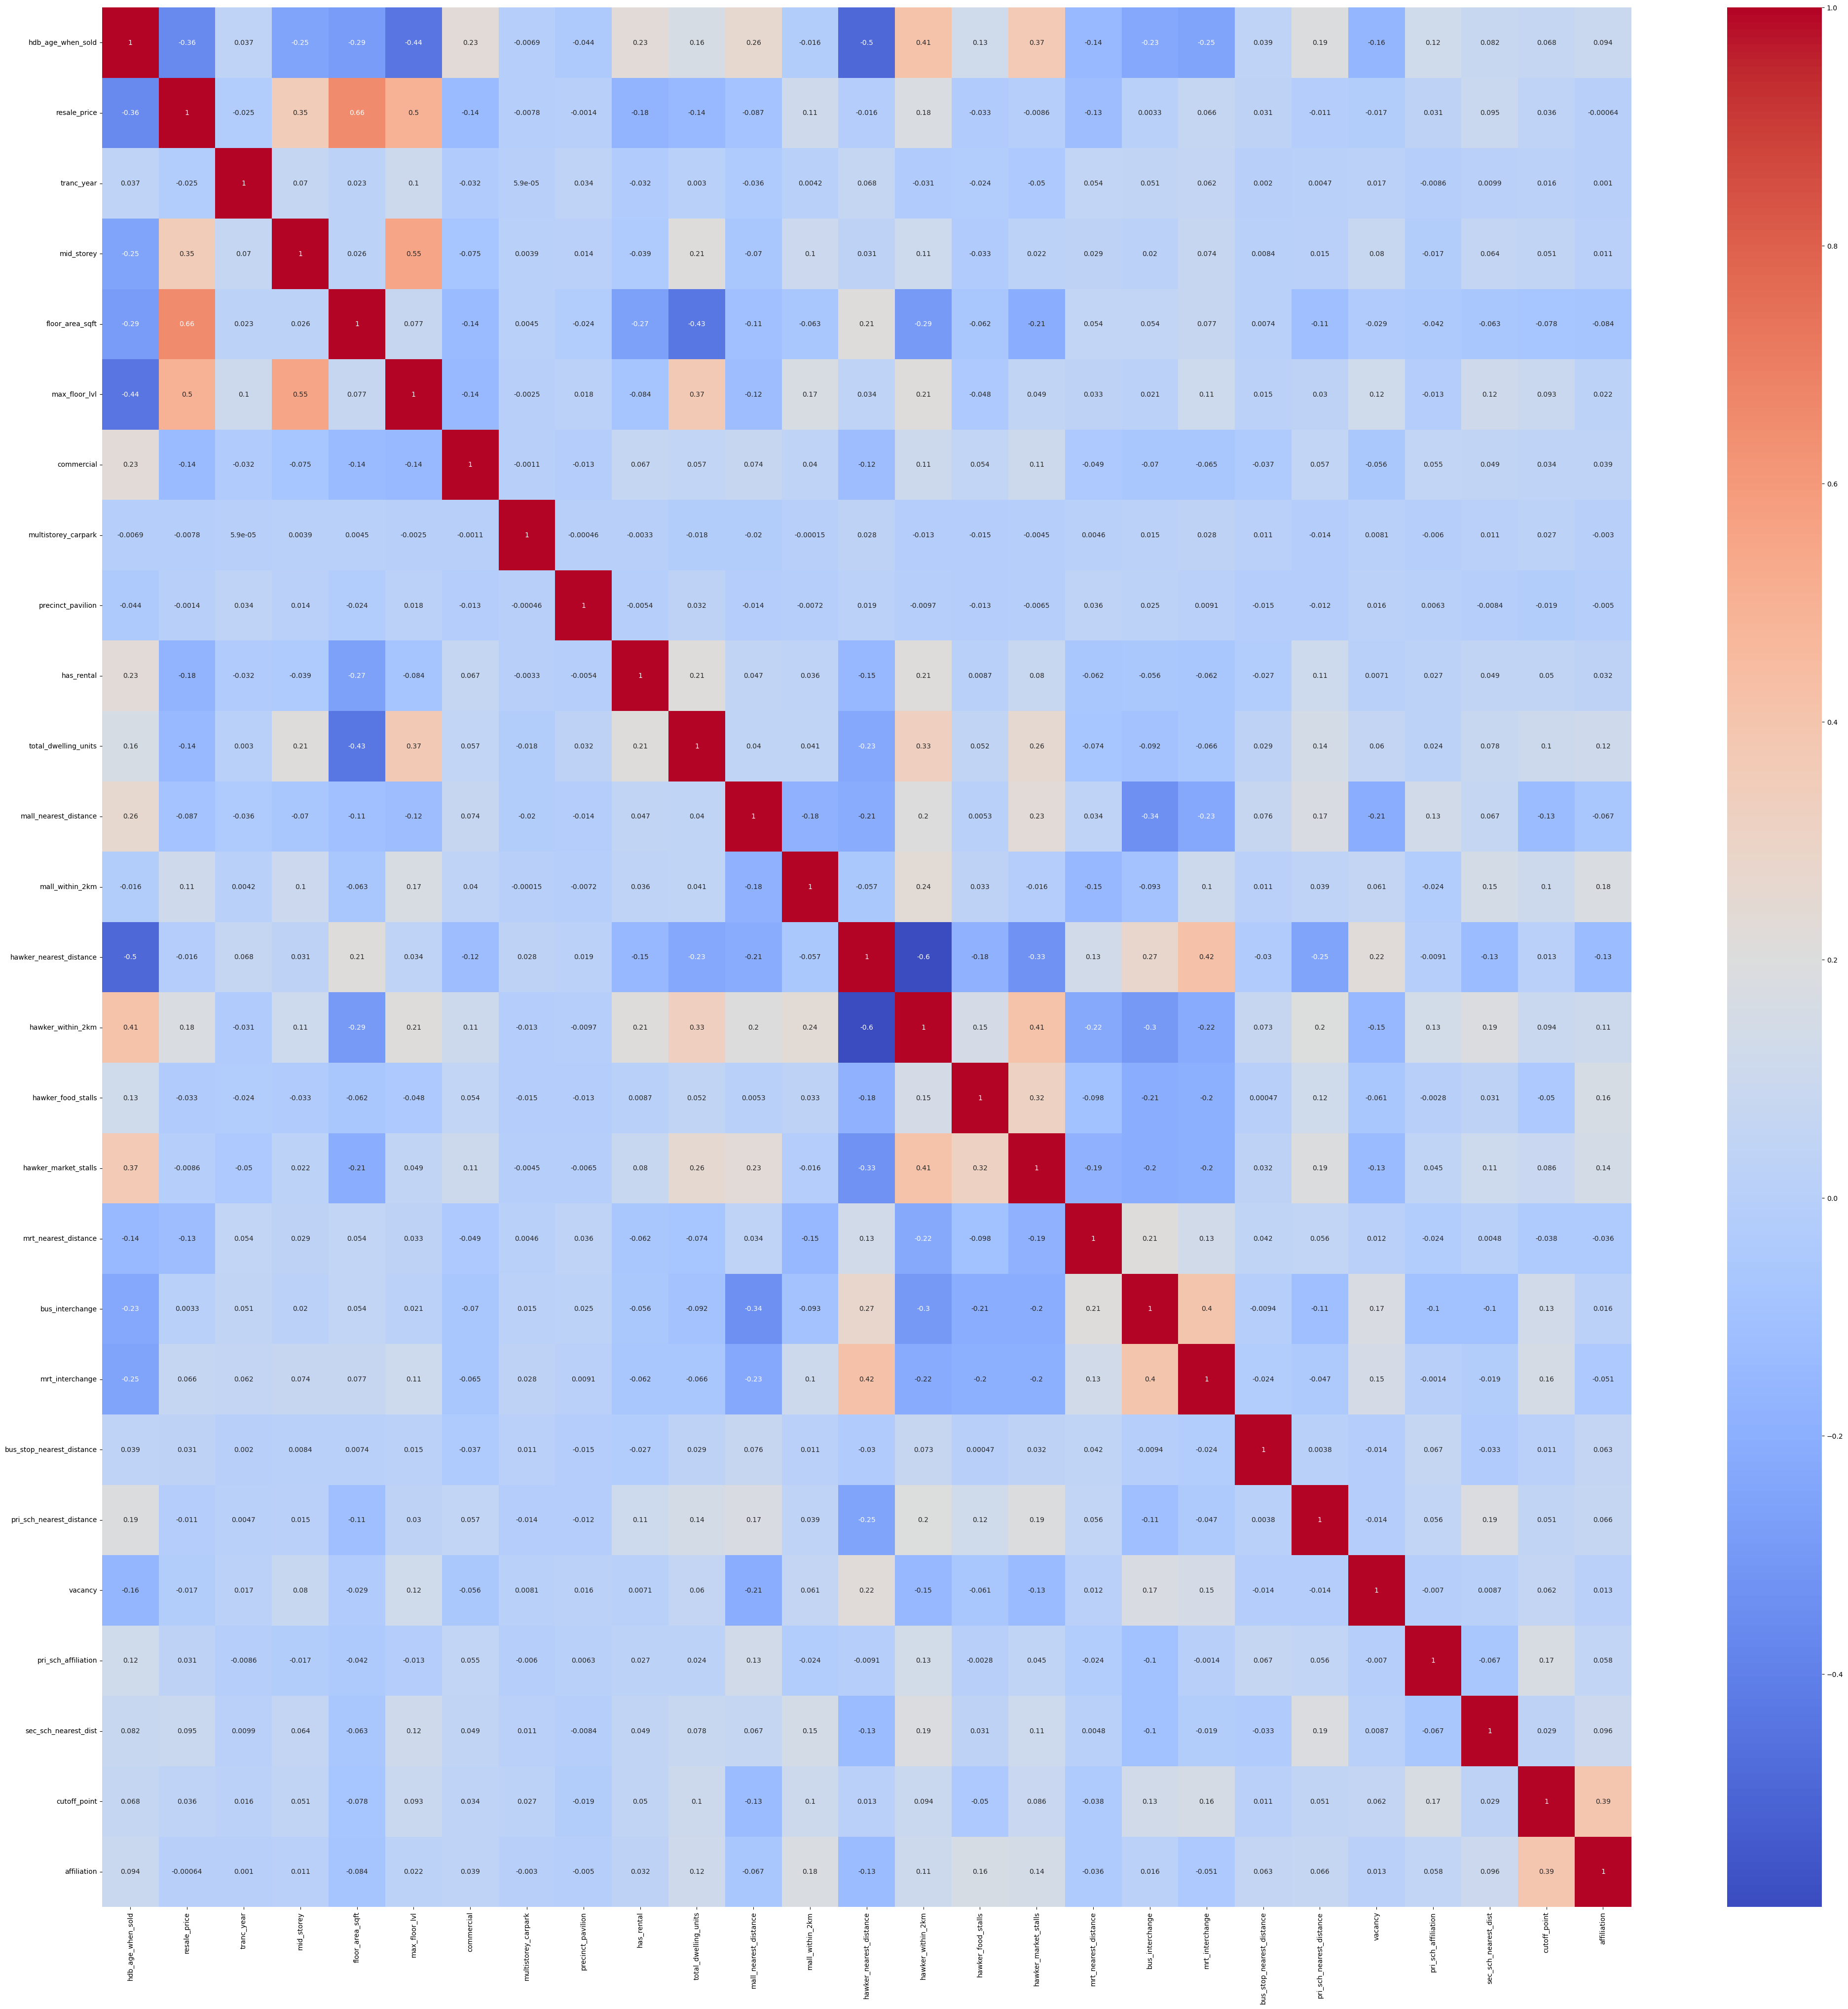

In [34]:
# seaborn heatmap visualization of pearson correlation coefficients between numeric variables in our dataframe
plt.figure(figsize=(50,50))

numeric_data = train.apply(pd.to_numeric,errors = 'coerce')
numeric_data = train.select_dtypes(include='number')

sns.heatmap(numeric_data.corr(),  annot=True, cmap='coolwarm')
plt.show()

### 3. Outlier Detection:


In [35]:
train.describe()

hdb_age_when_sold  resale_price     tranc_year     mid_storey  \
count      149805.000000  1.498050e+05  149805.000000  149805.000000   
mean           24.149875  4.486621e+05    2016.466513       8.263609   
std            11.824823  1.432125e+05       2.742246       5.482182   
min             1.000000  1.500000e+05    2012.000000       2.000000   
25%            15.000000  3.460000e+05    2014.000000       5.000000   
50%            25.000000  4.200000e+05    2017.000000       8.000000   
75%            33.000000  5.200000e+05    2019.000000      11.000000   
max            54.000000  1.258000e+06    2021.000000      50.000000   

       floor_area_sqft  max_floor_lvl     commercial  multistorey_carpark  \
count    149805.000000  149805.000000  149805.000000        149805.000000   
mean       1046.562426      15.107914       0.191930             0.000280   
std         263.060119       6.194526       0.393819             0.016742   
min         333.684000       2.000000       0.000000             0.000000   
25%         807.300000      12.000000       0.000000             0.000000   
50%        1022.580000      13.000000       0.000000             0.000000   
75%        1205.568000      16.000000       0.000000             0.000000   
max        3013.920000      50.000000       1.000000             1.000000   

       precinct_pavilion     has_rental  total_dwelling_units  \
count      149805.000000  149805.000000         149805.000000   
mean            0.000754       0.036821            124.592070   
std             0.027455       0.188323             58.309788   
min             0.000000       0.000000              2.000000   
25%             0.000000       0.000000             90.000000   
50%             0.000000       0.000000            112.000000   
75%             0.000000       0.000000            144.000000   
max             1.000000       1.000000            570.000000   

       mall_nearest_distance  mall_within_2km  hawker_nearest_distance  \
count          149805.000000    149805.000000            149805.000000   
mean              664.239826         5.197650              1167.736858   
std               368.739209         3.469713              1071.185899   
min                 0.000000         0.000000                 1.873295   
25%               391.473823         3.000000               371.492143   
50%               602.818388         5.000000               776.137748   
75%               868.818288         6.000000              1671.774246   
max              3496.402910        43.000000              4816.062542   

       hawker_within_2km  hawker_food_stalls  hawker_market_stalls  \
count      149805.000000       149805.000000         149805.000000   
mean            3.801242           48.701746             58.293308   
std             4.009217           19.150471             55.513732   
min             0.000000            0.000000              0.000000   
25%             1.000000           40.000000              0.000000   
50%             2.000000           43.000000             52.000000   
75%             7.000000           60.000000             99.000000   
max            19.000000          226.000000            477.000000   

       mrt_nearest_distance  bus_interchange  mrt_interchange  \
count         149805.000000    149805.000000    149805.000000   
mean             764.021115         0.545095         0.261453   
std              429.111674         0.497964         0.439428   
min               21.971410         0.000000         0.000000   
25%              458.086393         0.000000         0.000000   
50%              681.853546         1.000000         0.000000   
75%              974.299230         1.000000         1.000000   
max             3544.504228         1.000000         1.000000   

       bus_stop_nearest_distance  pri_sch_nearest_distance        vacancy  \
count              149805.000000             149805.000000  149805.000000   
mean                  115.194170        

##### 3.1 Managing Outliers and its relation to Discontinued HDB Terrace Houses

During our analysis of the data, we noticed that there were terraces (landed HDB properties that have been discontinued) that were also classified under the 3 ROOM flat type. 


In [36]:
# showing statistics for 3 room resale price
train_3room_price_only = train[(train['flat_type'] == '3 ROOM')]
train_3room_price_only['resale_price'].describe()

count    3.890500e+04
mean     3.263268e+05
std      6.740666e+04
min      1.700000e+05
25%      2.830000e+05
50%      3.180000e+05
75%      3.550000e+05
max      1.185000e+06
Name: resale_price, dtype: float64

The maximum price of a 3 room flat type according to the data above is almost 1.2 million dollars, which is not very realistic.

Judging by the profile of the Terrace house and the average cost of the property, we decided that a box plot to compare the resale prices of all 3 Room Flats vs 3 Room Terrace houses might be useful, to see if it could account for some of the high prices reflected.

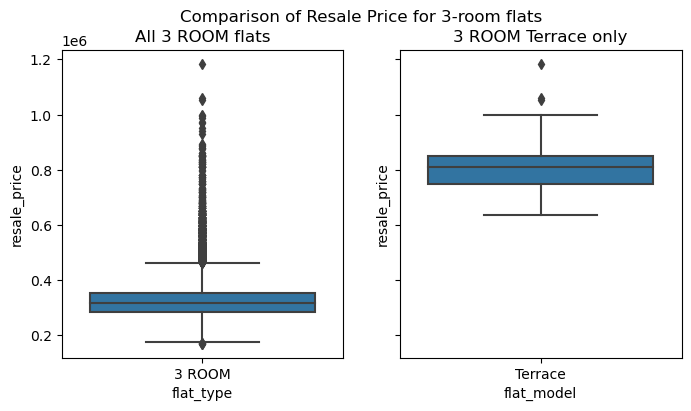

In [37]:
# Create two subplots sharing the same y-axis (resale_price)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(8, 4))

# Filter flat_type to include only rows where flat type is 3room
filtered_3room = train[train['flat_type'] == '3 ROOM']
filtered_3room_terrace = train[(train['flat_type'] == '3 ROOM') & (train['flat_model'] == 'Terrace')]

# Plot the first box plot
sns.boxplot(x = 'flat_type', y = 'resale_price', data=filtered_3room, ax=ax1)
ax1.set_title("All 3 ROOM flats")

# Plot the second box plot
sns.boxplot(x = 'flat_model', y = 'resale_price', data=filtered_3room_terrace, ax=ax2)
ax2.set_title("3 ROOM Terrace only")

# Set common labels
fig.suptitle("Comparison of Resale Price for 3-room flats", fontsize=12)
plt.show()

Analysis of box plot:

* There were many outliers found in the 3 ROOM flat type as seen in the first box plot. 

* The median resale price of all 3 room flats is significantly lower than the median price of the 3 room Terrace flats.

* The Terrace 3 Room flat price range are solely found among the outliers from the 3 ROOM flat type. In order to manage the number of outliers, it might be prudent to drop the data sets that encompass Terrace houses to show a more accurate description of the 3 ROOM flat type.

Based on the above analysis, we can drop all the terrace houses from the data set (there are a few in the 4 ROOM flat type which can be dropped using the same logic as 3 ROOM flats).

In [38]:
# checking shape of the data set before dropping
train.shape

(149805, 31)

In [39]:
# filtering all terrace houses from the data set
filtered_all_terrace = train[train['flat_model'] == 'Terrace']
filtered_all_terrace.shape


(95, 31)

In [40]:
# dropping all terrace houses from the data set
train = train.drop(filtered_all_terrace.index)
train.shape

(149710, 31)

In [41]:
train.head()

town  flat_type  flat_model  hdb_age_when_sold  resale_price  \
0  KALLANG/WHAMPOA     4 ROOM     Model A                 10      680000.0   
1           BISHAN     5 ROOM    Improved                 25      665000.0   
2      BUKIT BATOK  EXECUTIVE   Apartment                 16      838000.0   
3           BISHAN     4 ROOM     Model A                 20      550000.0   
4           YISHUN     4 ROOM  Simplified                 30      298000.0   

   tranc_year tranc_month  mid_storey  floor_area_sqft  max_floor_lvl  \
0        2016           5          11          968.760             25   
1        2012           7           8         1399.320              9   
2        2013           7          14         1550.016             16   
3        2012           4           3         1108.692             11   
4        2017          12           2          893.412              4   

   commercial  multistorey_carpark  precinct_pavilion  has_rental  \
0           0                    0                  0           0   
1           0                    0                  0           0   
2           0                    0                  0           0   
3           1                    0                  0           0   
4           0                    0                  0           0   

   total_dwelling_units  mall_nearest_distance  mall_within_2km  \
0                   142            1094.090418              7.0   
1                   112             866.941448              3.0   
2                    90            1459.579948              4.0   
3                    75             950.175199              4.0   
4                    48             729.771895              2.0   

   hawker_nearest_distance  hawker_within_2km  hawker_food_stalls  \
0               154.753357               13.0                  84   
1               640.151925                7.0                  80   
2              1762.082341                1.0                  84   
3               726.215262                9.0                  32   
4              1540.151439                1.0                  45   

   hawker_market_stalls  mrt_nearest_distance  bus_interchange  \
0                    60            330.083069                0   
1                    77            903.659703                1   
2                    95           1334.251197                1   
3                    86            907.453484                1   
4                     0            412.343032                0   

   mrt_interchange  bus_stop_nearest_distance  pri_sch_nearest_distance  \
0                0                  29.427395               1138.633422   
1                1                  58.207761                415.607357   
2                0                 214.747860                498.849039   
3                1                  43.396521                389.515528   
4                0                 129.422752                401.200584   

   vacancy  pri_sch_affiliation  sec_sch_nearest_dist  cutoff_point  \
0       78                    1           1138.633422           224   
1       45                    1            447.894399           232   
2       39                    0            180.074558           188   
3       20                    1            389.515528           253   
4       74                    0            312.025435           208   

   affiliation  
0            0  
1            0  
2            0  
3            1  
4            0

Text(0.5, 1.0, '3 ROOM flats without Terrace')

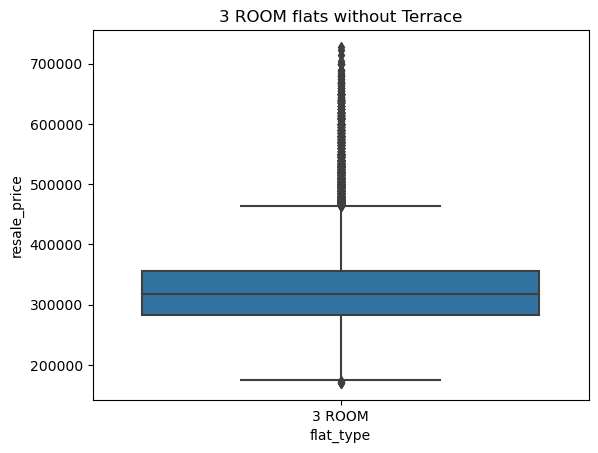

In [42]:
# Filter flat_type to include only rows where flat type is 3room
filtered_3room_no_terrace = train[train['flat_type'] == '3 ROOM']

# Plot the new 3 ROOM box plot after dropping terrace
sns.boxplot(x = 'flat_type', y = 'resale_price', data=filtered_3room_no_terrace)
plt.title("3 ROOM flats without Terrace")

In [43]:
# showing statistics for 3 room resale price after Terrace has been dropped from the data set
train_3room_price_only = train[(train['flat_type'] == '3 ROOM')]
train_3room_price_only['resale_price'].describe()

count     38819.000000
mean     325253.433908
std       63332.350589
min      170000.000000
25%      283000.000000
50%      317500.000000
75%      355000.000000
max      728000.000000
Name: resale_price, dtype: float64

The summary statistics above show a more realistic value for the price of a 3 room flat in Singapore. Though the prices do seem a bit high, and the box plot shows a number of outliers still existing, we can attribute them to other factors such as the town where the flat is located, which we explore in the following boxplot comparison.

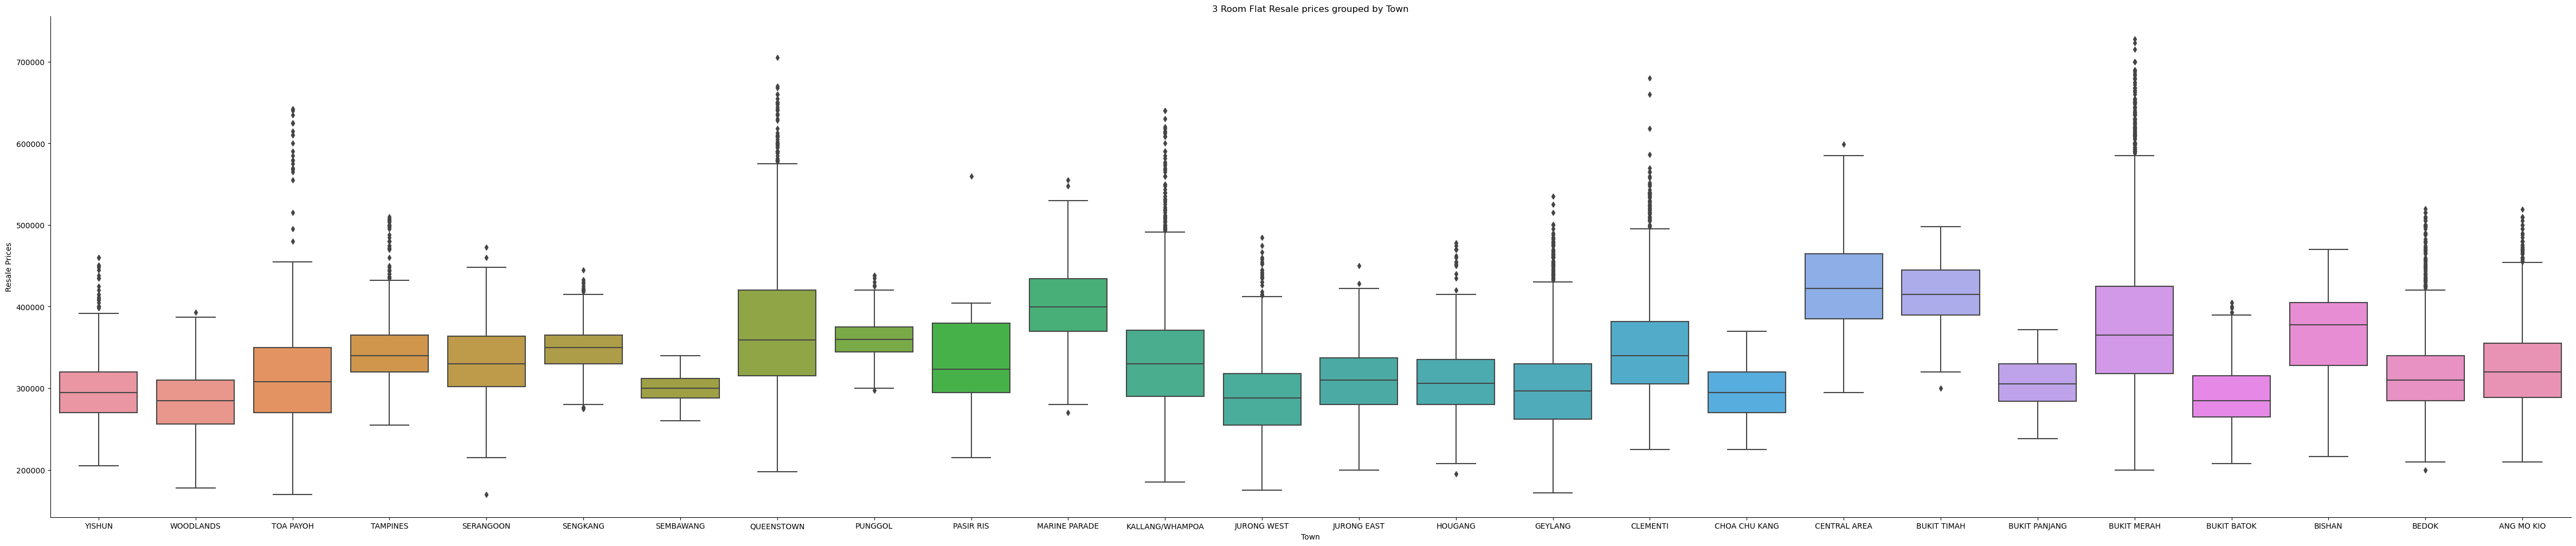

In [44]:
# plot boxplot of 3 room resale prices grouped by town 
plt.figure(figsize = (60,12))

# order the plots by median from smallest to largest
order = train.groupby(by=["town"])["resale_price"].median().iloc[::-1].index

# boxplot
sns.boxplot(data = train[train['flat_type'] == '3 ROOM'], x = "town", y = "resale_price", order = order)

# add in labels for axes and titles for plot
plt.title("3 Room Flat Resale prices grouped by Town")
plt.xlabel("Town")
plt.ylabel("Resale Prices")

# specify where to remove the spine of the plot
sns.despine(right = True, left = False)

Based on the boxplot above, there is value in calculating the upper bounds for the following towns, due to them having high number of outliers above $600 000.

In [45]:
# defining a function to calculate the upper bound value
def upper_bound_value(col_data, multiplier = 1.5):
    Q3 = col_data.quantile(0.75)
    IQR = col_data.quantile(0.75) - col_data.quantile(0.25)
    upper_bound = Q3 + multiplier * IQR
    return upper_bound

#calculating the upper bound value for all 3 room flats remaining as a baseline
flat_3room = train[train['flat_type'] == '3 ROOM']
upper_3room = upper_bound_value(flat_3room['resale_price'])
print(f'Upper Bounds for 3 ROOM flat_type is {upper_3room}')

#outlier towns based on the boxplot
outlier_towns = ['TOA PAYOH', 'QUEENSTOWN', 'KALLANG/WHAMPOA', 'CLEMENTI', 'BUKIT MERAH']

#generating the upper bounds for all the outlier towns as defined above
for n in outlier_towns:
    col = train[(train['town'] == n) & (train['flat_type'] == '3 ROOM')]
    upper_bounds = upper_bound_value(col['resale_price'])
    print(f'Upper Bounds for {n} is {upper_bounds}')

Upper Bounds for 3 ROOM flat_type is 463000.0
Upper Bounds for TOA PAYOH is 470000.0
Upper Bounds for QUEENSTOWN is 577500.0
Upper Bounds for KALLANG/WHAMPOA is 492500.0
Upper Bounds for CLEMENTI is 497500.0
Upper Bounds for BUKIT MERAH is 585500.0


Comparing the towns for the remaining 3 rooms, it seems like only certain towns show outliers above approximately $600 000, which is an approximation of the highest upper bound value for all the defined outlier towns as above.

There is a certain amount of logic to these areas having more outliers, the most obvious one being that these areas are considered centrally located. They are also areas that are relatively more accessible to the central area of Singapore, which tend to fetch higher prices. It is also notable that all these towns are considered mature towns / estates, which means that amenities are very much established and readily available, likely also contributing to higher resale prices.

We will explore more about this relationship between town, area and mature estates in the feature engineering section.

##### 3.2 Managing Outliers and its relation to Type S1 and Type S2 flat models


Type S1 (4 room) and Type S2 (5 room) flat models are special editions of HDB flats found only along Cantonment Road, at the Pinnacle@Duxton HDB estate. 

Flats in this development typically fetch relatively high prices due to a number of factors, including but not limited to:
* location / town : Central Area
* design : unique design features such as the sky parks and bridges connecting the blocks
* max_floor_level : the development is the first 50-storey public housing project in Singapore

(Reference: https://www.nlb.gov.sg/main/article-detail?cmsuuid=65771d77-a3e8-4d46-963d-7d3d70501fcf#:~:text=The%20sky%20bridges%20create%20two,with%20its%20unique%20design%20features.)

We begin by exploring the statistics with regard to each type.

In [46]:
# showing statistics for S1 resale price
train_s1_price_only = train[(train['flat_model'] == 'Type S1')]
train_s1_price_only['resale_price'].describe()

count    2.420000e+02
mean     9.050422e+05
std      7.210240e+04
min      6.500000e+05
25%      8.500000e+05
50%      9.000000e+05
75%      9.472500e+05
max      1.186888e+06
Name: resale_price, dtype: float64

In [47]:
# showing statistics for S2 resale price
train_s2_price_only = train[(train['flat_model'] == 'Type S2')]
train_s2_price_only['resale_price'].describe()

count    1.270000e+02
mean     1.019220e+06
std      8.565176e+04
min      8.200000e+05
25%      9.510000e+05
50%      1.000000e+06
75%      1.070000e+06
max      1.258000e+06
Name: resale_price, dtype: float64

Based on the above 2 cells, we can see that the prices for these two types of flats are generally high, with a mean of about $900 000 for S1 and $1 million for S2.

Comparatively, let's look at the statistics for all 4-room and all 5-room flats across Singapore.

In [48]:
# showing statistics for 4 room resale price
train_4room_price_only = train[(train['flat_type'] == '4 ROOM')]
train_4room_price_only['resale_price'].describe()

count    6.064800e+04
mean     4.441787e+05
std      1.093483e+05
min      2.180000e+05
25%      3.720750e+05
50%      4.200000e+05
75%      4.800000e+05
max      1.186888e+06
Name: resale_price, dtype: float64

In [49]:
# showing statistics for 5 room resale price
train_5room_price_only = train[(train['flat_type'] == '5 ROOM')]
train_5room_price_only['resale_price'].describe()

count    3.623200e+04
mean     5.367601e+05
std      1.350028e+05
min      2.700000e+05
25%      4.450000e+05
50%      5.000000e+05
75%      5.881250e+05
max      1.258000e+06
Name: resale_price, dtype: float64

Just comparing the means, we can see the stark difference in the resale prices between the S1/S2 and their respective counterparts.

We can plot boxplots to compare visually.

The first subplot diagram compares S1 against all 4-room flats.

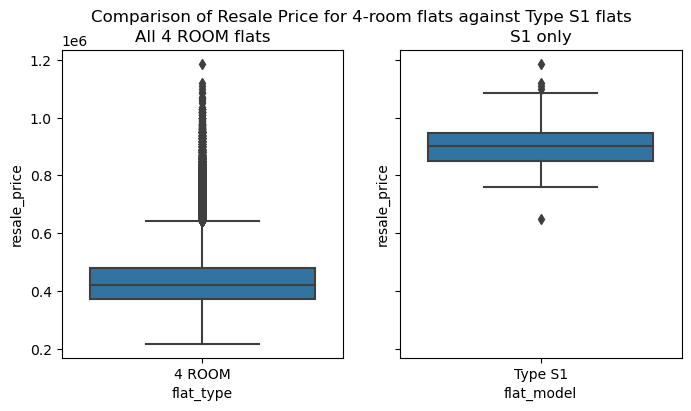

In [50]:
# Create two subplots sharing the same y-axis (resale_price)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(8, 4))

# Filter flat_type for 4 rooms only
filtered_4room = train[train['flat_type'] == '4 ROOM']

# Filter flat_model for S1 only
filtered_S1 = train[train['flat_model'] == 'Type S1']

# Plot the first box plot
sns.boxplot(x = 'flat_type', y = 'resale_price', data=filtered_4room, ax=ax1)
ax1.set_title("All 4 ROOM flats")

# Plot the second box plot
sns.boxplot(x = 'flat_model', y = 'resale_price', data=filtered_S1, ax=ax2)
ax2.set_title("S1 only")

# Set common labels
fig.suptitle("Comparison of Resale Price for 4-room flats against Type S1 flats", fontsize=12)
plt.show()

The second subplot diagram compares S2 against all 5-room flats.

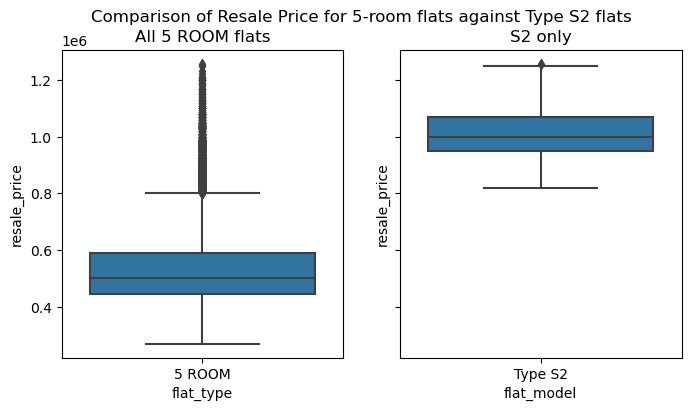

In [51]:
# Create two subplots sharing the same y-axis (resale_price)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(8, 4))

# Filter flat_type for 5 rooms only
filtered_5room = train[train['flat_type'] == '5 ROOM']

# Filter flat_model for S2 only
filtered_S2 = train[train['flat_model'] == 'Type S2']

# Plot the first box plot
sns.boxplot(x = 'flat_type', y = 'resale_price', data=filtered_5room, ax=ax1)
ax1.set_title("All 5 ROOM flats")

# Plot the second box plot
sns.boxplot(x = 'flat_model', y = 'resale_price', data=filtered_S2, ax=ax2)
ax2.set_title("S2 only")

# Set common labels
fig.suptitle("Comparison of Resale Price for 5-room flats against Type S2 flats", fontsize=12)
plt.show()

Analysis:

In both comparisons, we can see that, similar to the 3 room vs Terrace comparison, S1 and S2 are mostly outliers when compared to 4 room and 5 room flats respectively.

Therefore, similar to the 3 room comparisons, we proceed to drop S1 and S2 from the data to see if there is any change in the way the data behaves statistically.

In [52]:
#creating a copy of the df for analysis
train_copy = train.copy()

In [53]:
# checking shape of the data set before dropping
train_copy.shape

(149710, 31)

In [54]:
# filtering all S1 and S2 from the data set
filtered_all_S1S2 = train_copy[(train_copy['flat_model'] == 'Type S1') | (train_copy['flat_model'] == 'Type S2')]
filtered_all_S1S2.shape


(369, 31)

In [55]:
# dropping all S1 and S2 from the data set

train_copy = train.drop(filtered_all_S1S2.index)
train_copy.shape

(149341, 31)

Text(0.5, 1.0, '4 ROOM flats without S1')

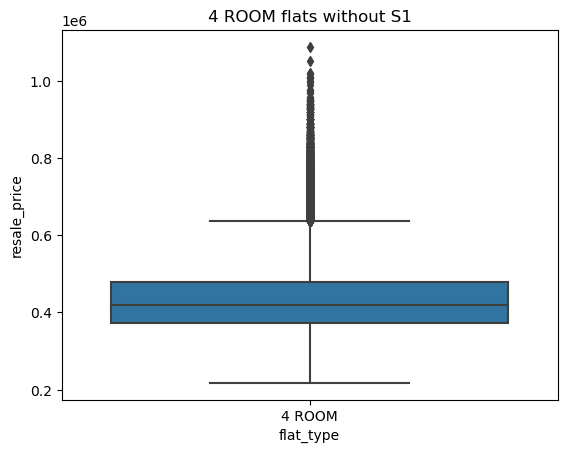

In [56]:
# Filter flat_type to include only rows where flat type is 4room
filtered_4room_no_S1 = train_copy[train_copy['flat_type'] == '4 ROOM']

# Plot the new 4 ROOM box plot after dropping terrace
sns.boxplot(x = 'flat_type', y = 'resale_price', data=filtered_4room_no_S1)
plt.title("4 ROOM flats without S1")

In [57]:
# showing statistics for 4 room resale price after S1 has been dropped from the data set
train_4room_price_only = train_copy[(train_copy['flat_type'] == '4 ROOM')]
train_4room_price_only['resale_price'].describe()

count    6.040600e+04
mean     4.423324e+05
std      1.054983e+05
min      2.180000e+05
25%      3.720000e+05
50%      4.200000e+05
75%      4.780000e+05
max      1.088000e+06
Name: resale_price, dtype: float64

Analysis for S1 : 
* There doesn't seem to be a large difference in the values for the statistical mean and other quartile values whether or not S1 is dropped.
* There is a change in the max price (with a drop of approximately $100 00). While that might hold some significance, it is important to note that the outliers are still existing close to the $1 million range, despite mean staying at approximately $400 000.


Now we look at the 5 room data to see if there are any changes after we dropped S2.

Text(0.5, 1.0, '5 ROOM flats without S2')

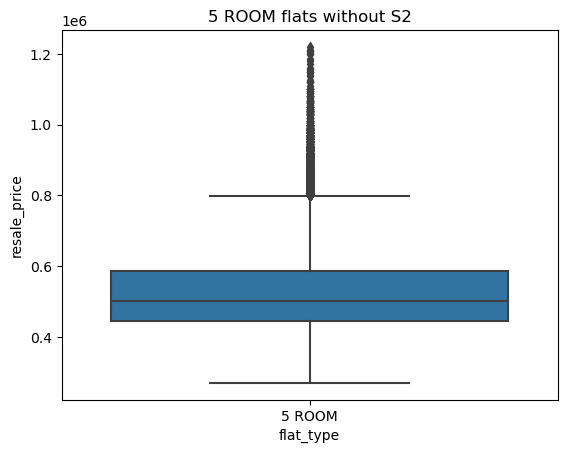

In [58]:
# Filter flat_type to include only rows where flat type is 5room
filtered_5room_no_S2 = train_copy[train_copy['flat_type'] == '5 ROOM']

# Plot the new 5 ROOM box plot after dropping terrace
sns.boxplot(x = 'flat_type', y = 'resale_price', data=filtered_5room_no_S2)
plt.title("5 ROOM flats without S2")

In [59]:
# showing statistics for 5 room resale price after S2 has been dropped from the data set
train_5room_price_only = train_copy[(train_copy['flat_type'] == '5 ROOM')]
train_5room_price_only['resale_price'].describe()

count    3.610500e+04
mean     5.350631e+05
std      1.320704e+05
min      2.700000e+05
25%      4.440000e+05
50%      5.000000e+05
75%      5.860000e+05
max      1.220000e+06
Name: resale_price, dtype: float64

Analysis for S2 : 
* Similar to 4 room, there doesn't seem to be a large difference in the values for the statistical mean and other quartile values whether or not S2 is dropped.
* There is a change in the max price (with a drop of approximately $30 000). While that might hold some significance, it is important to note that the outliers are still existing around the $1.2 million range, despite mean staying at approximately $530 000.

To see where these outliers are residing (excluding S1 and S2), we can plot a comparison boxplot by town, displaying both 4 room and 5 room flats.

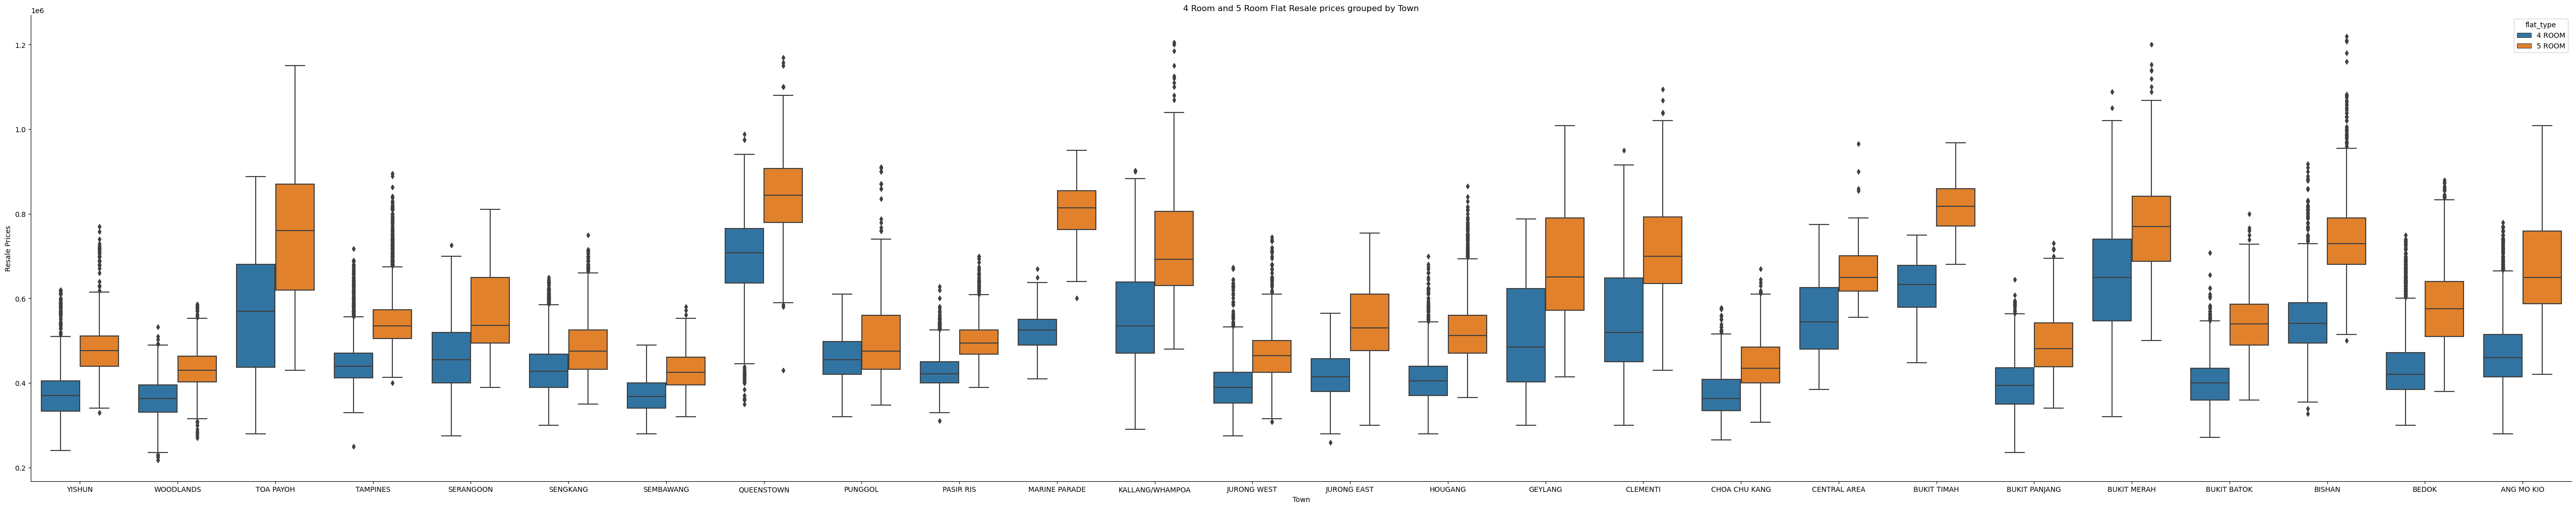

In [60]:
# plot boxplot of 4 room  and 5 room resale prices grouped by town 
plt.figure(figsize = (65,12))

# order the plots by median from smallest to largest
order = train_copy.groupby(by=["town"])["resale_price"].median().iloc[::-1].index

# boxplot
sns.boxplot(data = train_copy[(train_copy['flat_type'] == '4 ROOM') | (train_copy['flat_type'] == '5 ROOM')], x = "town", y = "resale_price", hue = "flat_type", order = order)

# add in labels for axes and titles for plot
plt.title("4 Room and 5 Room Flat Resale prices grouped by Town")
plt.xlabel("Town")
plt.ylabel("Resale Prices")

# specify where to remove the spine of the plot
sns.despine(right = True, left = False)

Analysis:

It is interesting to note that most of the "outlier towns" seen here are similar to the ones seen in the analysis of the 3 room resale prices in the earlier section. This is with the exception of Bishan, where the prices of 4 and 5 room flats are comparable to the other "outlier towns" like Bukit Merah or Kallang/Whampoa.

Conclusion : 

It might not be as effective to drop S1 and S2 from the data set as despite them being excluded from the data, there are still 4 and 5 room flats being sold within the same range. Therefore, we can keep S1 and S2 in the data set, and treat them the same as we do the other 4 and 5 room flats.

### 4. Feature Engineering:


##### 4.1 Reorganising Town into Region * Mature Estates

When managing the outliers in the previous section, the high prices seen in a number of towns were indicative of a pattern. We seek to explore this pattern by reorganising the town feature into regions, and indicating whether it is a mature estate.

In [61]:
# mapping the town to the region and tagging whether it is mature or non-mature estate
town_region_mapping = {'SEMBAWANG': 'NORTH',
                  'WOODLANDS': 'NORTH',
                  'YISHUN': 'NORTH',
                  'ANG MO KIO': 'NORTH-EAST MATURE',
                  'HOUGANG': 'NORTH-EAST',
                  'PUNGGOL': 'NORTH-EAST',
                  'SENGKANG': 'NORTH-EAST',
                  'SERANGOON': 'NORTH-EAST MATURE',
                  'BEDOK': 'EAST MATURE',
                  'PASIR RIS': 'EAST MATURE',
                  'TAMPINES': 'EAST MATURE',
                  'BUKIT BATOK': 'WEST',
                  'BUKIT PANJANG': 'WEST',
                  'CHOA CHU KANG': 'WEST',
                  'CLEMENTI': 'WEST MATURE',
                  'JURONG EAST': 'WEST',
                  'JURONG WEST': 'WEST',
                  'BISHAN': 'CENTRAL MATURE',
                  'BUKIT MERAH': 'CENTRAL MATURE',
                  'BUKIT TIMAH': 'CENTRAL MATURE',
                  'CENTRAL AREA': 'CENTRAL MATURE',
                  'GEYLANG': 'CENTRAL MATURE',
                  'KALLANG/WHAMPOA': 'CENTRAL MATURE',
                  'MARINE PARADE': 'CENTRAL MATURE',
                  'QUEENSTOWN': 'CENTRAL MATURE',
                  'TOA PAYOH': 'CENTRAL MATURE'
                }
train['region_maturity'] = np.vectorize(town_region_mapping.get)(train['town'])

#reorganising the new column in sequence for clarity
train.insert(0, 'region_maturity', train.pop('region_maturity'))

In [62]:
train

region_maturity             town         flat_type        flat_model  \
0       CENTRAL MATURE  KALLANG/WHAMPOA            4 ROOM           Model A   
1       CENTRAL MATURE           BISHAN            5 ROOM          Improved   
2                 WEST      BUKIT BATOK         EXECUTIVE         Apartment   
3       CENTRAL MATURE           BISHAN            4 ROOM           Model A   
4                NORTH           YISHUN            4 ROOM        Simplified   
...                ...              ...               ...               ...   
150629           NORTH        WOODLANDS         EXECUTIVE         Apartment   
150630            WEST      JURONG WEST            5 ROOM          Improved   
150631     EAST MATURE            BEDOK         EXECUTIVE         Apartment   
150632  CENTRAL MATURE       QUEENSTOWN            3 ROOM          Improved   
150633           NORTH           YISHUN  MULTI-GENERATION  Multi Generation   

        hdb_age_when_sold  resale_price  tranc_year tranc_month  mid_storey  \
0                      10      680000.0        2016           5          11   
1                      25      665000.0        2012           7           8   
2                      16      838000.0        2013           7          14   
3                      20      550000.0        2012           4           3   
4                      30      298000.0        2017          12           2   
...                   ...           ...         ...         ...         ...   
150629                 25      625000.0        2020           9           5   
150630                 16      455000.0        2017           6           5   
150631                 27      733000.0        2020          12          11   
150632                 42      338000.0        2016           5           8   
150633                 31      765000.0        2018           6           8   

        floor_area_sqft  max_floor_lvl  commercial  multistorey_carpark  \
0               968.760             25           0                    0   
1              1399.320              9           0                    0   
2              1550.016             16           0                    0   
3              1108.692             11           1                    0   
4               893.412              4           0                    0   
...                 ...            ...         ...                  ...   
150629         1733.004             12           1                    0   
150630         1184.040             16           0                    0   
150631         1550.016             15           0                    0   
150632          635.076             10           0                    0   
150633         1765.296             12           0                    0   

        precinct_pavilion  has_rental  total_dwelling_units  \
0                       0           0                   142   
1                       0           0                   112   
2                       0           0                    90   
3                       0           0                    75   
4                       0           0                    48   
...                   ...         ...                   ...   
150629                  0           0                    60   
150630                  0           0                    90   
150631                  0           0                    56   
150632                  0           1                   209   
150633                  0           0                    66   

        mall_nearest_distance  mall_within_2km  hawker_nearest_distance  \
0                 1094.090418              7.0               154.753357   
1                  866.941448              3.0               640.151925   
2                 1459.579948              4.0              1762.082341   
3                  950.175199              4.0               726.215262   
4                  729.771895              2.0              1540.151439   
.

Next we also want to streamline the number of features for the column flat_model, to reduce noise and combine features with similar characteristics.

The categories within flat_model are reorganised into the following:

* standard_models = standard, new generation, simplified, model A, model A2, improved, apartment, premium apartment
    * This category represents the 'basic' flat models that HDB has offered to buyers over the years. While each flat model offers a slightly different layout or characteristic, they are in essence a general representation of the bulk of HDB flats sold.
* maisonette_models = maisonette, improved-maisonette, model A maisonette, premium maisonette, premium apartment loft
    * This category represents all the HDB flats that have two floors. It is worth noting that the premium apartment loft is a modernised version of the older maisonettes and can span across 4- and 5-room types. However, these are currently exclusive to only 2 towns in Singapore.
* private_design_models = DBSS, type s1, type s2
    * This category represents the group of flats that are found in developments that were designed by private developers. These units typically come with more unique external features like balconies and full-length glass windows.

Unused categories in flat_model or flat_type to be dropped due to insignificant numbers of data points in the data set and inability to be generalised:
* adjoined flat : indicating flats that were created by combining two smaller HDB flats together into one unit. 
* 2-room : there are only 4 data points in this set that are found in this category.
* 1 ROOM : 1 room flat type
* multi-generation : HDB flats sold to multi-generational families living together

In [63]:
# defining the different categories 
standard_models = ['Standard', 'New Generation', 'Simplified', 'Model A', 'Model A2', 'Improved', 'Apartment', 'Premium Apartment']
maisonette_models = ['Maisonette', 'Improved-Maisonette', 'Model A-Maisonette', 'Premium Maisonette', 'Premium Apartment Loft']
private_design_models = ['DBSS', 'Type S1', 'Type S2']

#assigning the different rows in the df to their respective categories
conditions = [
    train['flat_model'].isin(standard_models),
    train['flat_model'].isin(maisonette_models),
    train['flat_model'].isin(private_design_models)
]

#creating a new column called model_category containing the newly defined categories
values = ['Standard', 'Maisonette', 'Private Design']
train['model_category'] = np.select(conditions, values, default='Unknown')

#reorganising the new column in sequence for clarity
train.insert(4, 'model_category', train.pop('model_category'))


In [64]:
#dropping rows with the unused flat model (adjoined and 2-room)
filtered_adj_2r = train[(train['flat_model'] == 'Adjoined flat') | (train['flat_model'] == '2-room')]
train = train.drop(filtered_adj_2r.index)

#dropping rows with the unused flat types (1 room and multi-gen)
filtered_multigen_1r = train[(train['flat_type'] == '1 ROOM') | (train['flat_type'] == 'MULTI-GENERATION')]
train = train.drop(filtered_multigen_1r.index)

#dropping the unused columns flat_model, town 
train.drop(columns = ['flat_model','town'], inplace=True)


In [65]:
train

region_maturity  flat_type model_category  hdb_age_when_sold  \
0       CENTRAL MATURE     4 ROOM       Standard                 10   
1       CENTRAL MATURE     5 ROOM       Standard                 25   
2                 WEST  EXECUTIVE       Standard                 16   
3       CENTRAL MATURE     4 ROOM       Standard                 20   
4                NORTH     4 ROOM       Standard                 30   
...                ...        ...            ...                ...   
150628      NORTH-EAST     5 ROOM       Standard                  4   
150629           NORTH  EXECUTIVE       Standard                 25   
150630            WEST     5 ROOM       Standard                 16   
150631     EAST MATURE  EXECUTIVE       Standard                 27   
150632  CENTRAL MATURE     3 ROOM       Standard                 42   

        resale_price  tranc_year tranc_month  mid_storey  floor_area_sqft  \
0           680000.0        2016           5          11          968.760   
1           665000.0        2012           7           8         1399.320   
2           838000.0        2013           7          14         1550.016   
3           550000.0        2012           4           3         1108.692   
4           298000.0        2017          12           2          893.412   
...              ...         ...         ...         ...              ...   
150628      555000.0        2020           7          11         1216.332   
150629      625000.0        2020           9           5         1733.004   
150630      455000.0        2017           6           5         1184.040   
150631      733000.0        2020          12          11         1550.016   
150632      338000.0        2016           5           8          635.076   

        max_floor_lvl  commercial  multistorey_carpark  precinct_pavilion  \
0                  25           0                    0                  0   
1                   9           0                    0                  0   
2                  16           0                    0                  0   
3                  11           1                    0                  0   
4                   4           0                    0                  0   
...               ...         ...                  ...                ...   
150628             26           0                    0                  0   
150629             12           1                    0                  0   
150630             16           0                    0                  0   
150631             15           0                    0                  0   
150632             10           0                    0                  0   

        has_rental  total_dwelling_units  mall_nearest_distance  \
0                0                   142            1094.090418   
1                0                   112             866.941448   
2                0                    90            1459.579948   
3                0                    75             950.175199   
4                0                    48             729.771895   
...            ...                   ...                    ...   
150628           0                   150             565.636046   
150629           0                    60             585.138715   
150630           0                    90             250.084466   
150631           0                    56            1790.053482   
150632           1                   209             587.244922   

        mall_within_2km  hawker_nearest_distance  hawker_within_2km  \
0                   7.0               154.753357               13.0   
1                   3.0               640.151925                7.0   
2                   4.0              1762.082341                1.0   
3                   4.0               726.215262                9.0   
4                   2.0              1540.151439                1.0   
...                 ...                      ...                ...   
15

Next we engineer a feature called units_per_floor to calculate the density of flats in each block. This will be used to explore the idea of how privacy might factor in to resale price. Depending on how many units there are per floor, the amenities in the block (e.g. lifts) or the noise level based on the number of people living in the block or even in the adjacent flats, might deter or encourage someone to purchase a flat in that block. 

In [66]:
#creating column units_per_floor
train['units_per_floor'] = train['total_dwelling_units'] / train['max_floor_lvl']

#insert column units_per_floor at index 3
train.insert(3, 'units_per_floor', train.pop('units_per_floor'))

#dropping the previously engineered columns
train.drop(columns = ['total_dwelling_units','max_floor_lvl'], inplace=True)


In [67]:
#checking to make sure that the data frame has the right columns left after this step
train.head()

region_maturity  flat_type model_category  units_per_floor  \
0  CENTRAL MATURE     4 ROOM       Standard         5.680000   
1  CENTRAL MATURE     5 ROOM       Standard        12.444444   
2            WEST  EXECUTIVE       Standard         5.625000   
3  CENTRAL MATURE     4 ROOM       Standard         6.818182   
4           NORTH     4 ROOM       Standard        12.000000   

   hdb_age_when_sold  resale_price  tranc_year tranc_month  mid_storey  \
0                 10      680000.0        2016           5          11   
1                 25      665000.0        2012           7           8   
2                 16      838000.0        2013           7          14   
3                 20      550000.0        2012           4           3   
4                 30      298000.0        2017          12           2   

   floor_area_sqft  commercial  multistorey_carpark  precinct_pavilion  \
0          968.760           0                    0                  0   
1         1399.320           0                    0                  0   
2         1550.016           0                    0                  0   
3         1108.692           1                    0                  0   
4          893.412           0                    0                  0   

   has_rental  mall_nearest_distance  mall_within_2km  \
0           0            1094.090418              7.0   
1           0             866.941448              3.0   
2           0            1459.579948              4.0   
3           0             950.175199              4.0   
4           0             729.771895              2.0   

   hawker_nearest_distance  hawker_within_2km  hawker_food_stalls  \
0               154.753357               13.0                  84   
1               640.151925                7.0                  80   
2              1762.082341                1.0                  84   
3               726.215262                9.0                  32   
4              1540.151439                1.0                  45   

   hawker_market_stalls  mrt_nearest_distance  bus_interchange  \
0                    60            330.083069                0   
1                    77            903.659703                1   
2                    95           1334.251197                1   
3                    86            907.453484                1   
4                     0            412.343032                0   

   mrt_interchange  bus_stop_nearest_distance  pri_sch_nearest_distance  \
0                0                  29.427395               1138.633422   
1                1                  58.207761                415.607357   
2                0                 214.747860                498.849039   
3                1                  43.396521                389.515528   
4                0                 129.422752                401.200584   

   vacancy  pri_sch_affiliation  sec_sch_nearest_dist  cutoff_point  \
0       78                    1           1138.633422           224   
1       45                    1            447.894399           232   
2       39                    0            180.074558           188   
3       20                    1            389.515528           253   
4       74                    0            312.025435           208   

   affiliation  
0            0  
1            0  
2            0  
3            1  
4            0

In [68]:
train.shape

(149308, 30)

##### 4.2 Dummifying categorical variables and one-hot encoding



Before we can create the model, we should dummify categorical variables to allow the data to be converted into a numerical format.

Here are the variables we will dummify:

* tranc_month : Even though this was originally in an integer format, we should dummify this and treat it as categorical as the integer values are not representative of numerical value. Rather, it is an indication of which month in the year it is representing. Should we keep it as an integer (and not dummify it), the algorithm might read it differently from how we intend it to be read. Dummifying this column will help to avoid misinterpretation of this column and its values.

* town, flat_type, flat_model : These variables are categorical. We dummify and apply one-hot encoding here.

* commercial, multistorey_carpark, precinct_pavilion, pri_sch_affiliation, affiliation : These are all boolean or int (1/0) variables. We dummify and apply one-hot encoding here.

In [69]:
train.columns

Index(['region_maturity', 'flat_type', 'model_category', 'units_per_floor',
       'hdb_age_when_sold', 'resale_price', 'tranc_year', 'tranc_month',
       'mid_storey', 'floor_area_sqft', 'commercial', 'multistorey_carpark',
       'precinct_pavilion', 'has_rental', 'mall_nearest_distance',
       'mall_within_2km', 'hawker_nearest_distance', 'hawker_within_2km',
       'hawker_food_stalls', 'hawker_market_stalls', 'mrt_nearest_distance',
       'bus_interchange', 'mrt_interchange', 'bus_stop_nearest_distance',
       'pri_sch_nearest_distance', 'vacancy', 'pri_sch_affiliation',
       'sec_sch_nearest_dist', 'cutoff_point', 'affiliation'],
      dtype='object')

In [70]:
dummies_cols = ['region_maturity', 'flat_type', 'model_category','tranc_month']
train_dummies = train.copy()
for col in dummies_cols:
    train_dummies = pd.get_dummies(train_dummies, columns=[col], prefix=col, drop_first=True)
train_dummies.columns

Index(['units_per_floor', 'hdb_age_when_sold', 'resale_price', 'tranc_year',
       'mid_storey', 'floor_area_sqft', 'commercial', 'multistorey_carpark',
       'precinct_pavilion', 'has_rental', 'mall_nearest_distance',
       'mall_within_2km', 'hawker_nearest_distance', 'hawker_within_2km',
       'hawker_food_stalls', 'hawker_market_stalls', 'mrt_nearest_distance',
       'bus_interchange', 'mrt_interchange', 'bus_stop_nearest_distance',
       'pri_sch_nearest_distance', 'vacancy', 'pri_sch_affiliation',
       'sec_sch_nearest_dist', 'cutoff_point', 'affiliation',
       'region_maturity_EAST MATURE', 'region_maturity_NORTH',
       'region_maturity_NORTH-EAST', 'region_maturity_NORTH-EAST MATURE',
       'region_maturity_WEST', 'region_maturity_WEST MATURE',
       'flat_type_3 ROOM', 'flat_type_4 ROOM', 'flat_type_5 ROOM',
       'flat_type_EXECUTIVE', 'model_category_Private Design',
       'model_category_Standard', 'tranc_month_2', 'tranc_month_3',
       'tranc_month_4', 't

In [71]:
train_dummies 

units_per_floor  hdb_age_when_sold  resale_price  tranc_year  \
0              5.680000                 10      680000.0        2016   
1             12.444444                 25      665000.0        2012   
2              5.625000                 16      838000.0        2013   
3              6.818182                 20      550000.0        2012   
4             12.000000                 30      298000.0        2017   
...                 ...                ...           ...         ...   
150628         5.769231                  4      555000.0        2020   
150629         5.000000                 25      625000.0        2020   
150630         5.625000                 16      455000.0        2017   
150631         3.733333                 27      733000.0        2020   
150632        20.900000                 42      338000.0        2016   

        mid_storey  floor_area_sqft  commercial  multistorey_carpark  \
0               11          968.760           0                    0   
1                8         1399.320           0                    0   
2               14         1550.016           0                    0   
3                3         1108.692           1                    0   
4                2          893.412           0                    0   
...            ...              ...         ...                  ...   
150628          11         1216.332           0                    0   
150629           5         1733.004           1                    0   
150630           5         1184.040           0                    0   
150631          11         1550.016           0                    0   
150632           8          635.076           0                    0   

        precinct_pavilion  has_rental  mall_nearest_distance  mall_within_2km  \
0                       0           0            1094.090418              7.0   
1                       0           0             866.941448              3.0   
2                       0           0            1459.579948              4.0   
3                       0           0             950.175199              4.0   
4                       0           0             729.771895              2.0   
...                   ...         ...                    ...              ...   
150628                  0           0             565.636046              3.0   
150629                  0           0             585.138715              6.0   
150630                  0           0             250.084466              4.0   
150631                  0           0            1790.053482              2.0   
150632                  0           1             587.244922              3.0   

        hawker_nearest_distance  hawker_within_2km  hawker_food_stalls  \
0                    154.753357               13.0                  84   
1                    640.151925                7.0                  80   
2                   1762.082341                1.0                  84   
3                    726.215262                9.0                  32   
4                   1540.151439                1.0                  45   
...                         ...                ...                 ...   
150628              2443.370839                0.0                  40   
150629               973.725973                3.0                  43   
150630              1807.769865                1.0                  72   
150631              1076.260436                4.0                  36   
150632               318.550377                8.0                  39   

        hawker_market_stalls  mrt_nearest_distance  bus_interchange  \
0                         60            330.083069                0   
1                         77            903.659703                1   
2                         95           1334.251197                1   
3                         86            907.453484                1   
4                          0            412.343032           

### 5. Training our Model:

##### 5.1 Train-Test Split:


Split your dataset into training and testing sets. The training set is used to train the model, and the testing set is used to evaluate its performance.

We split the existing training set into a further train/test set so that we have something to use to test our model on.


In [72]:
# define X and y variables
X = train_dummies.drop(columns= 'resale_price')
y = train_dummies['resale_price']

In [73]:
#train / test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##### 5.2 Scaling our features

Before running our various models, we first scale the features using StandardScaler to scale all the numerical values to Z-score to account for the different properties of our features.

In [74]:
#display number of unique values for X so that we can sieve out the numerical columns to be used for standard scaler
X.nunique()

units_per_floor                      1207
hdb_age_when_sold                      54
tranc_year                             10
mid_storey                             22
floor_area_sqft                       161
commercial                              2
multistorey_carpark                     2
precinct_pavilion                       2
has_rental                              2
mall_nearest_distance                8939
mall_within_2km                        42
hawker_nearest_distance              8941
hawker_within_2km                      20
hawker_food_stalls                     52
hawker_market_stalls                   70
mrt_nearest_distance                 8941
bus_interchange                         2
mrt_interchange                         2
bus_stop_nearest_distance            8941
pri_sch_nearest_distance             8941
vacancy                                66
pri_sch_affiliation                     2
sec_sch_nearest_dist                 8941
cutoff_point                      

In [75]:
#sieving out the numerical columns to scale
numerical_cols = ['units_per_floor','hdb_age_when_sold','tranc_year','mid_storey','floor_area_sqft','mall_nearest_distance','mall_within_2km','hawker_nearest_distance','hawker_within_2km',
                  'hawker_food_stalls','hawker_market_stalls','mrt_nearest_distance','bus_stop_nearest_distance','pri_sch_nearest_distance','vacancy','sec_sch_nearest_dist','cutoff_point']

In [76]:
#scale the values using StandardScaler()
#this should only be done on continuous numerical columns as defined in the above list

# Initialize the StandardScaler
ss = StandardScaler()

# Fit and transform the scaler on the training data for numerical columns
X_train[numerical_cols] = ss.fit_transform(X_train[numerical_cols])

# Transform the testing data using the same scaler for numerical columns
X_test[numerical_cols] = ss.transform(X_test[numerical_cols])

##### 5.3 OLS (Linear Regression)

In [77]:
#instantiate model
lr = LinearRegression()

#calculating cross val score
cross_val_score(lr, X_train, y_train, cv=5).mean()

0.8475256799449594

In [78]:
#fit model
lr.fit(X_train, y_train)

#train score
print (f'train score: {lr.score(X_train, y_train)}')

#test score
print (f'test score: {lr.score(X_test, y_test)}')

train score: 0.8477318855858245
test score: 0.8465678755715677


In [79]:
# use stats model to see which coefficients are significant in influencing our linear regression model
X_statsmod = sm.add_constant(X) 
model_sm = sm.OLS(y, X_statsmod.astype(float)).fit()
model_sm.summary()
coefficients = model_sm.params
coefficients_df = pd.DataFrame({'Variable': coefficients.index, 'Coefficient': abs(coefficients).values})

# Sort the DataFrame by 'Coefficient' in ascending order
pd.set_option("display.max_rows", 90)
sorted_coefficients = coefficients_df.sort_values(by='Coefficient', ascending = False)

# Print the sorted coefficients
print(sorted_coefficients)

                             Variable   Coefficient
0                               const  4.581368e+06
27              region_maturity_NORTH  1.625558e+05
30               region_maturity_WEST  1.409969e+05
28         region_maturity_NORTH-EAST  9.857056e+04
35                flat_type_EXECUTIVE  9.575949e+04
36      model_category_Private Design  8.840223e+04
26        region_maturity_EAST MATURE  8.527238e+04
34                   flat_type_5 ROOM  6.672124e+04
29  region_maturity_NORTH-EAST MATURE  5.661394e+04
37            model_category_Standard  5.433213e+04
7                 multistorey_carpark  5.378316e+04
33                   flat_type_4 ROOM  5.024758e+04
32                   flat_type_3 ROOM  3.149655e+04
31        region_maturity_WEST MATURE  2.952260e+04
8                   precinct_pavilion  2.333403e+04
9                          has_rental  1.088217e+04
42                      tranc_month_6  1.002858e+04
41                      tranc_month_5  9.759343e+03
43          

##### 5.4 Ridge

In [80]:
# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
r_alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of ridge alphas.
# Fit the model using the best ridge alpha
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5).fit(X_train, y_train)

print(ridge_cv.get_params)

#using ridgeCV to find the best alpha for the model
ridge_cv.alpha_

<bound method BaseEstimator.get_params of RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, scoring='r2')>


1.0

In [81]:
# Evaluate model using R2.
print(f'train score: {ridge_cv.score(X_train, y_train)}')
print(f'test score: {ridge_cv.score(X_test, y_test)}')

train score: 0.8477317877879044
test score: 0.8465688859603977


In [82]:
# generate the coefficients of the features for lasso regularisation
coefficients_ridge_cv = abs(ridge_cv.coef_)
coefficients_ridge_cv.shape

# create a list of tuples by merging feature name and coefficient
ridge_list = list(zip(X, coefficients_ridge_cv))

# show the list sorted by coefficient values in descending order
sorted(ridge_list, key = lambda x: x[1], reverse=True)

[('region_maturity_NORTH', 161863.95505145408),
 ('region_maturity_WEST', 140494.1066046537),
 ('region_maturity_NORTH-EAST', 98489.13407453106),
 ('flat_type_EXECUTIVE', 95608.48699168106),
 ('model_category_Private Design', 89352.99225118593),
 ('region_maturity_EAST MATURE', 84658.64109987258),
 ('floor_area_sqft', 75823.07629532031),
 ('flat_type_5 ROOM', 66905.19759092013),
 ('region_maturity_NORTH-EAST MATURE', 56447.173341774156),
 ('multistorey_carpark', 54829.09070924043),
 ('model_category_Standard', 54399.86855220077),
 ('flat_type_4 ROOM', 50387.85129784468),
 ('hdb_age_when_sold', 46583.96915466639),
 ('flat_type_3 ROOM', 31622.67404602483),
 ('region_maturity_WEST MATURE', 29278.129641632542),
 ('precinct_pavilion', 27995.140261298668),
 ('mid_storey', 23607.188743750474),
 ('mrt_nearest_distance', 20069.552048777594),
 ('hawker_nearest_distance', 18194.202988261855),
 ('hawker_market_stalls', 12741.806491751096),
 ('has_rental', 10483.563819151384),
 ('hawker_within_2km'

##### 5.5 Lasso

In [83]:
#run lasso_cv and fit to the train set
lasso_cv = LassoCV(n_alphas=100, cv=5).fit(X_train,y_train)

print(lasso_cv.get_params)

#using lassoCV to find the best alpha for the model
lasso_cv.alpha_

<bound method BaseEstimator.get_params of LassoCV(cv=5)>


93.1694593096534

In [84]:
# Evaluate model using R2.
print(f'train score: {lasso_cv.score(X_train, y_train)}')
print(f'test score: {lasso_cv.score(X_test, y_test)}')

train score: 0.846446845326311
test score: 0.8453977502843274


In [85]:
# generate the coefficients of the features for lasso regularisation
coefficients_lasso_cv = abs(lasso_cv.coef_)
coefficients_lasso_cv.shape

# create a list of tuples by merging feature name and coefficient
lasso_list = list(zip(X, coefficients_lasso_cv))

# show the list sorted by coefficient values in descending order
sorted(lasso_list, key = lambda x: x[1], reverse=True)

[('region_maturity_NORTH', 149936.83792295927),
 ('region_maturity_WEST', 129263.80443652869),
 ('region_maturity_NORTH-EAST', 86345.71154111064),
 ('model_category_Private Design', 84825.66559961425),
 ('floor_area_sqft', 83980.24746354236),
 ('region_maturity_EAST MATURE', 75880.71527938863),
 ('model_category_Standard', 53834.7514735875),
 ('region_maturity_NORTH-EAST MATURE', 48296.76126185953),
 ('hdb_age_when_sold', 46695.36847424696),
 ('flat_type_EXECUTIVE', 36678.92217331069),
 ('mid_storey', 24040.502045295914),
 ('mrt_nearest_distance', 20066.598261246803),
 ('hawker_nearest_distance', 17737.91067161342),
 ('flat_type_5 ROOM', 17210.154417700753),
 ('region_maturity_WEST MATURE', 15582.706062000965),
 ('hawker_within_2km', 13624.793673778955),
 ('hawker_market_stalls', 12297.119047481852),
 ('has_rental', 10639.892732212862),
 ('units_per_floor', 8794.092490603747),
 ('flat_type_4 ROOM', 8561.166253049727),
 ('bus_interchange', 7547.5223930025795),
 ('mrt_interchange', 6720.

##### 5.6 Comparing the models and model-selection

In [86]:
# Calculation of MSE for all three models to determine best model
print (f'MSE for OLS: {metrics.mean_squared_error(y_train, lr.predict(X_train))}')
print (f'MSE for Ridge: {metrics.mean_squared_error(y_train, ridge_cv.predict(X_train))}')
print (f'MSE for Lasso: {metrics.mean_squared_error(y_train, lasso_cv.predict(X_train))}')


MSE for OLS: 3082285683.059752
MSE for Ridge: 3082287662.733107
MSE for Lasso: 3108298096.816187


Analysis of the models leading to selection of final model:

Final model selected for testing is Ridge.

Reasoning:

* Based on the Lasso results, the last few coefficients that were lassoed to 0 had included 3-room and pri school affiliation. Based on domain knowledge, we know that these features are important to considerations when it comes to resale price fluctuations. Therefore, we felt that Lasso does not seem to be as suitable, even though the scores were close to ridge.

* Based on the MSE for the three models above, the values for ridge are the lowest. This means that the mean square error is the smallest among the three, making it the most suitable model for us to use for the best predictions. The lower the MSE, the better the regression model.

In [87]:
# save it in a pkl file
import joblib

joblib.dump(ridge_cv, "./trained.pkl")

['./trained.pkl']

### 6. Communication of Findings:


#### 6.1 Findings from our model and data

Based on our selected model (Ridge), we are able to extract the top features that affect resale price. 

We plot a chart below for visualisation.

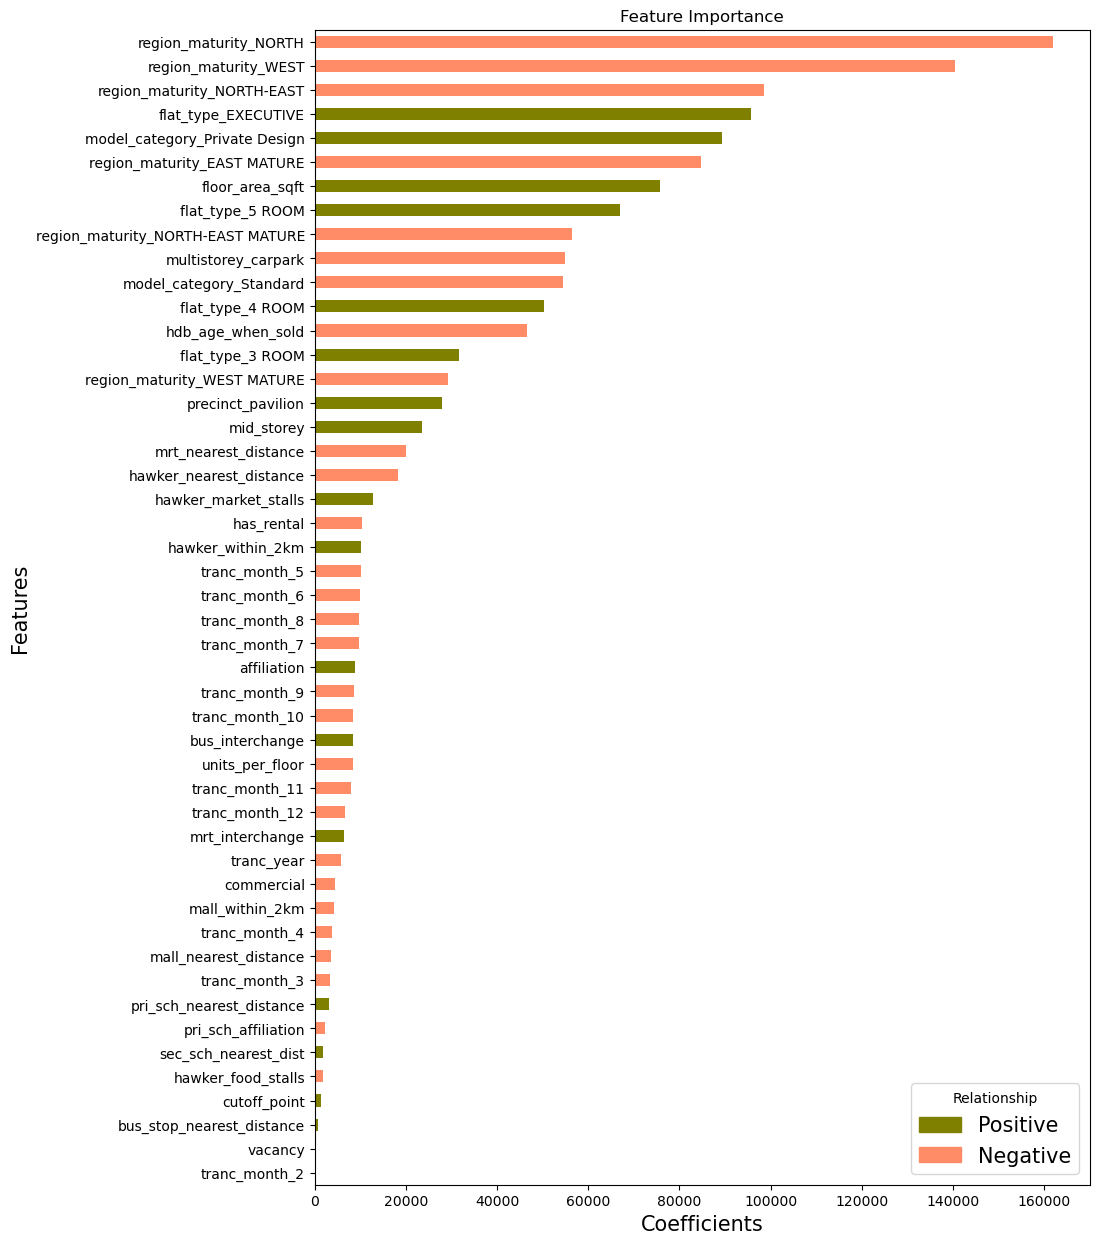

In [88]:
# get the coefficients from ridge regularization model
no_abs_coefficients_ridge_cv = ridge_cv.coef_
no_abs_ridge_cv_list = list(zip(X, no_abs_coefficients_ridge_cv))
sorted(no_abs_ridge_cv_list, key = lambda x: x[1], reverse=True)

# create the dataframe for plotting
df_coeff = pd.DataFrame(no_abs_ridge_cv_list, columns=["feature", "coefficients"])
df_coeff

# create a new column in the df for absolute values
df_coeff["coefficients_abs"] = np.abs(df_coeff["coefficients"])
df_coeff = df_coeff.sort_values("coefficients_abs").reset_index(drop=True)

# colour the features according to if the value is positive or negative
df_coeff["color"] = df_coeff["coefficients"].apply(lambda x: "#808000" if x>0 else "#FF8C66")

# plot the bar chart
df_coeff.plot.barh(x = "feature", y = "coefficients_abs", color = df_coeff['color'], figsize=(10,15))

# for legend labelling
colors = {"Positive":"#808000", "Negative":"#FF8C66"}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
legend = plt.legend(handles, labels, title="Relationship", fontsize = '15', loc = "lower right")
plt.setp(legend.get_title(),fontsize='10')

# for axis labelling
plt.xlabel("Coefficients", size=15), plt.ylabel("Features", size=15)
plt.title("Feature Importance")
plt.show(); 

Analysis: 

The top features that stand out represent the features that affect our resale prices the most. 

When they are highly positive, this implies that they are positively impacting (i.e. causing the prices to rise) our resale prices. The top features that make resale prices go up are 3-room and up sizes, as well as the floor area of the flat.

Conversely, when they are highly negatice, this implies that they are negatively impacting (i.e. causing the prices to dip) our resale prices. The top features that make resale prices dip are the regions North, West and North-east, all of which are non-mature. 

These findings coincide with our experience, research, and current domain knowledge about the factors that affect resale prices.

#### 6.2 Findings and Recommendations for the Defined Problem Statement

Based on our problem statement, we came up with recommendations for 3 potential groups of buyers: 


##### 6.2.1 Budget-conscious
- To consider purchasing units in the North region of Singapore as it generally has the lowest prices compared to the other regions, if location is not a concern
- Likely due to towns in the North are non mature


/var/folders/fk/tl38z_650pnb8d8bzsdfs50h0000gn/T/ipykernel_32517/4196698956.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='region_maturity', y='resale_price', hue='flat_type', data=filtered_data_2_3_4_5_e, marker='o', palette='hls', ci=None)


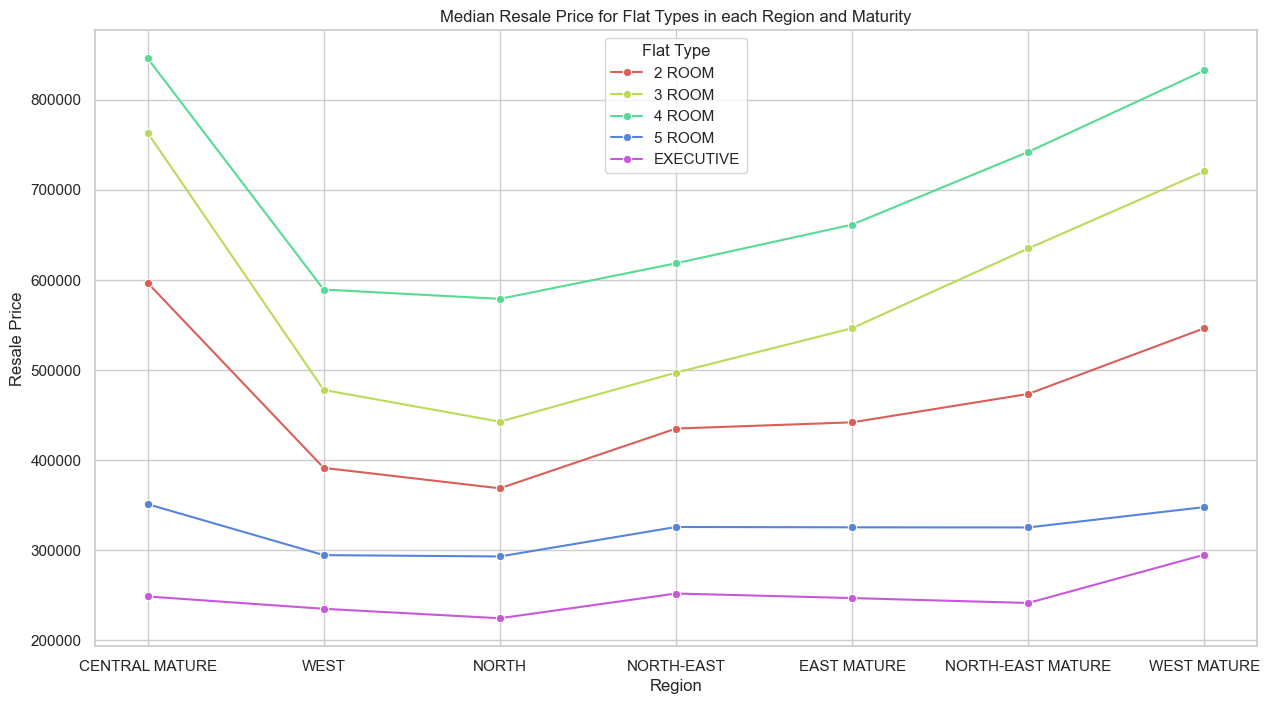

In [89]:
filtered_data_2_3_4_5_e = train[(train['flat_type'] =='2 ROOM') | (train['flat_type'] =='3 ROOM') | (train['flat_type'] =='4 ROOM') | (train['flat_type'] =='5 ROOM') | (train['flat_type'] =='EXECUTIVE')]

# Use Seaborn for a more visually appealing plot
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")  # Set the style of the plot

# Create a line plot with Seaborn
sns.lineplot(x='region_maturity', y='resale_price', hue='flat_type', data=filtered_data_2_3_4_5_e, marker='o', palette='hls', ci=None)

plt.title('Median Resale Price for Flat Types in each Region and Maturity')
plt.xlabel('Region')
plt.ylabel('Resale Price')
plt.legend(title='Flat Type', labels=['2 ROOM','3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE'], loc='upper center')
plt.show()


##### 6.2.2 Family-oriented
- To consider 4-room, 5-room and executive flat types 
- Can still cost-save by considering units the North, West and North-east regions


/var/folders/fk/tl38z_650pnb8d8bzsdfs50h0000gn/T/ipykernel_32517/2539990969.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='region_maturity', y='resale_price', hue='flat_type', data=filtered_data, marker='o', palette='hls', ci=None)


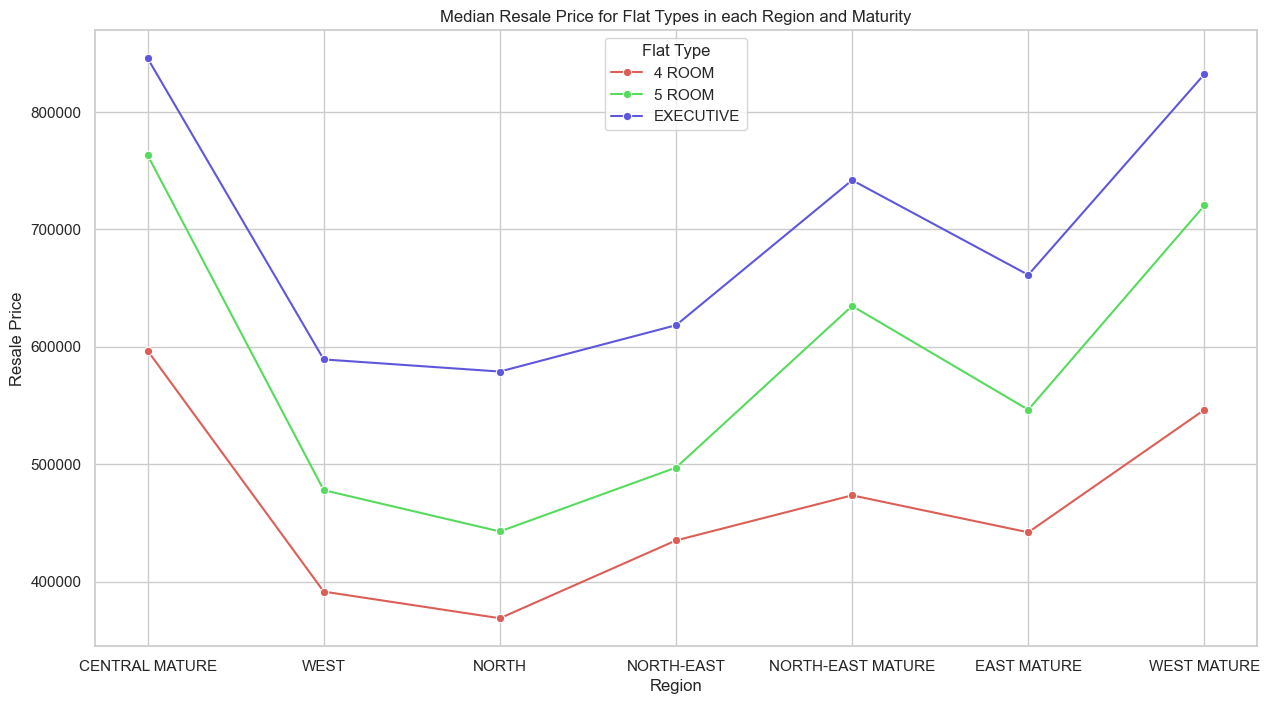

In [90]:
filtered_data = train[(train['flat_type'] =='4 ROOM') | (train['flat_type'] =='5 ROOM') | (train['flat_type'] =='EXECUTIVE')]

# Use Seaborn for a more visually appealing plot
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")  # Set the style of the plot

# Create a line plot with Seaborn
sns.lineplot(x='region_maturity', y='resale_price', hue='flat_type', data=filtered_data, marker='o', palette='hls', ci=None)

plt.title('Median Resale Price for Flat Types in each Region and Maturity')
plt.xlabel('Region')
plt.ylabel('Resale Price')
plt.legend(title='Flat Type', labels=['4 ROOM', '5 ROOM', 'EXECUTIVE'], loc='upper center')
plt.show()

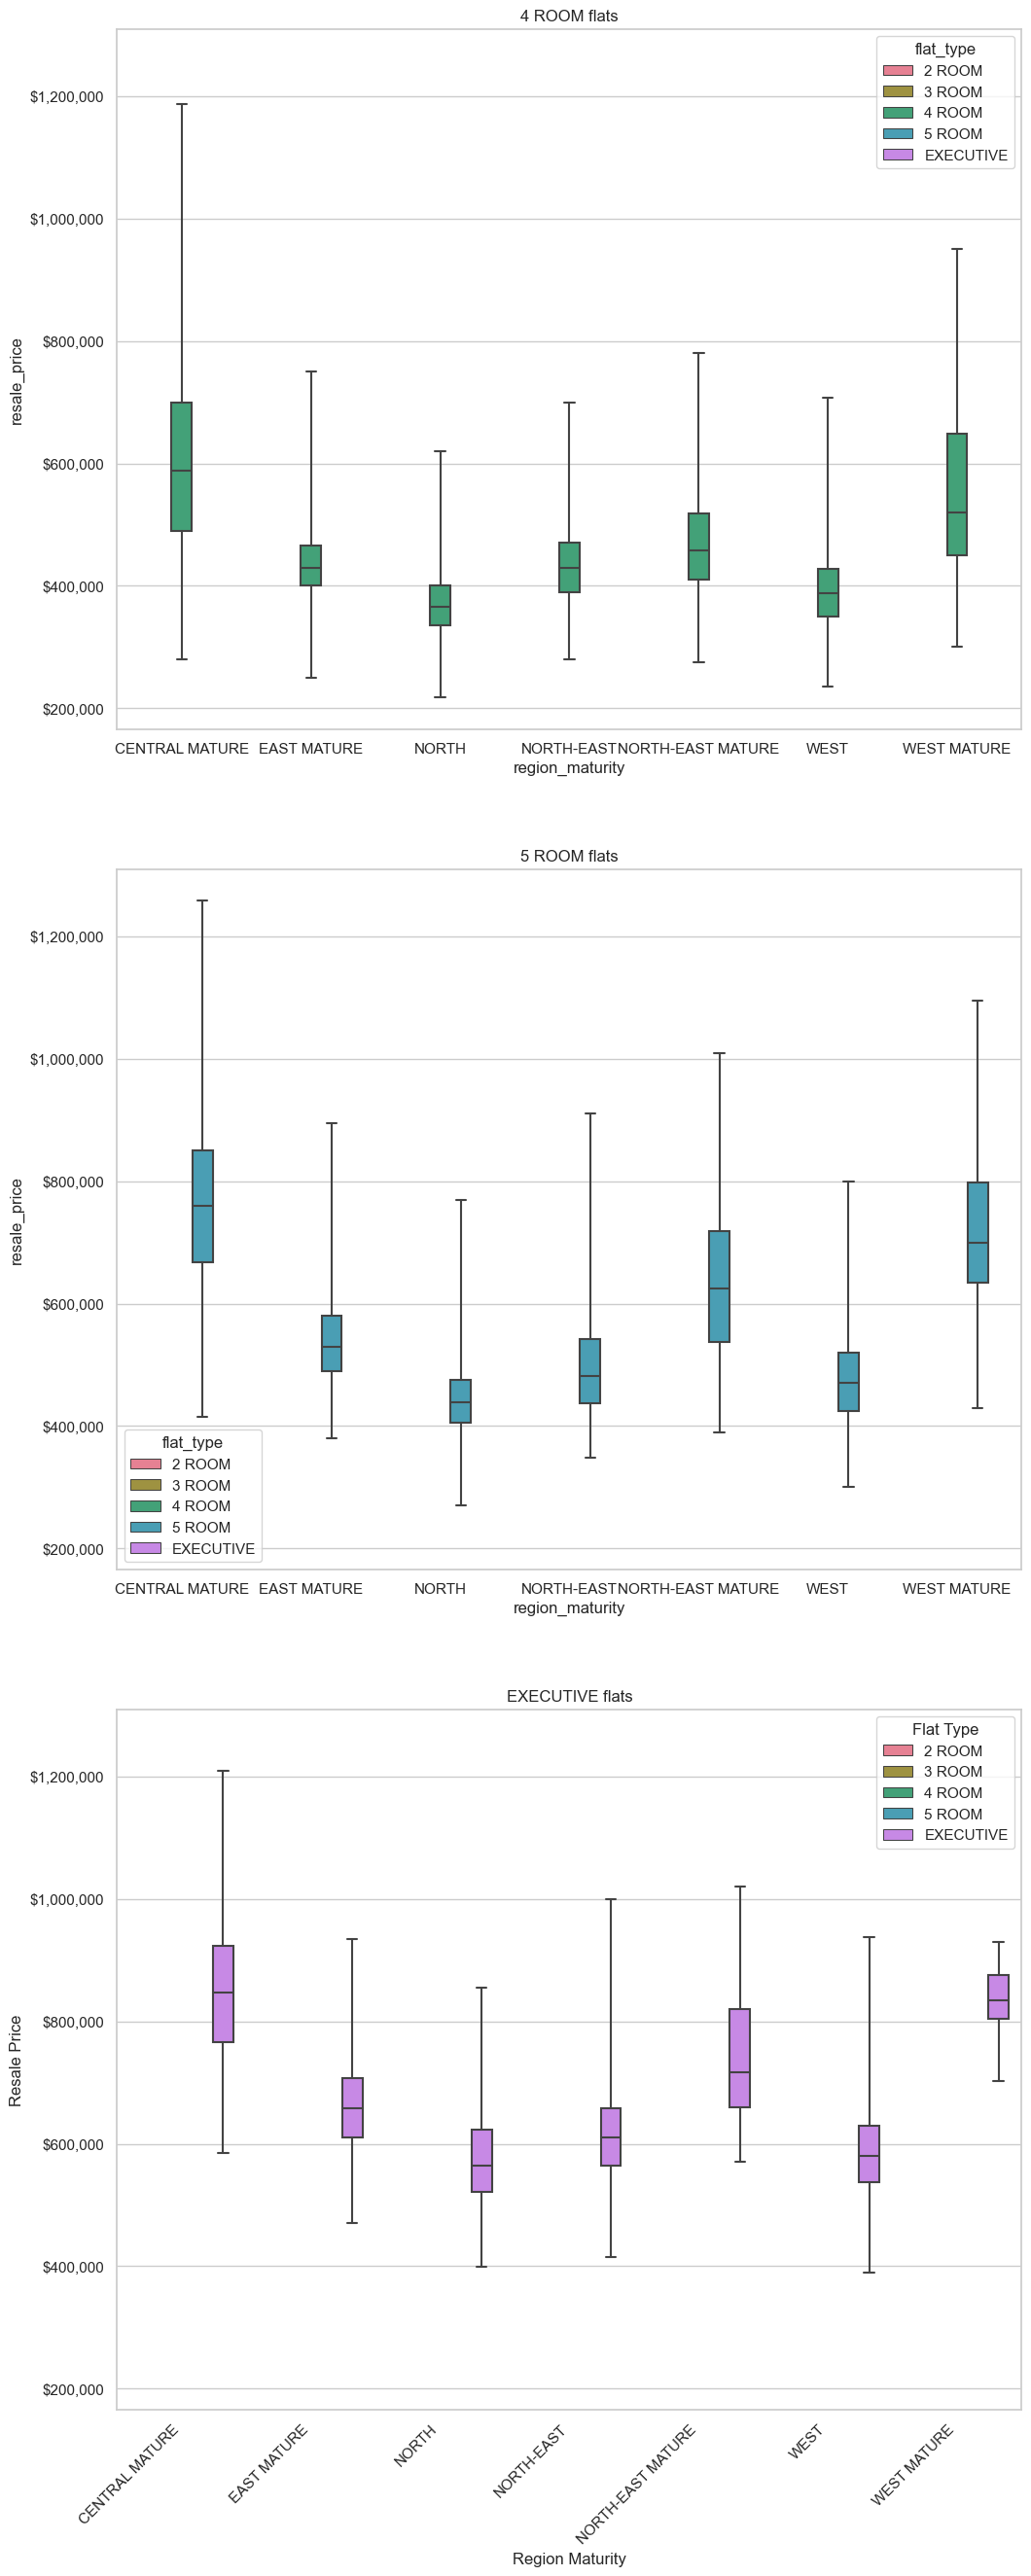

In [91]:
train['region_maturity'] = pd.Categorical(train['region_maturity'], categories=sorted(train['region_maturity'].unique()))
train['flat_type'] = pd.Categorical(train['flat_type'], categories=sorted(train['flat_type'].unique()))

#Use subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharey=True, figsize=(12, 36))

# Use Seaborn for boxplots
sns.set(style="whitegrid")  # Set the style of the plot

filtered_data_4 = train[train['flat_type'] == '4 ROOM']
filtered_data_5 = train[train['flat_type'] == '5 ROOM']
filtered_data_exec = train[train['flat_type'] == 'EXECUTIVE']

# Plot the first box plot
sns.boxplot(x='region_maturity', y='resale_price', hue='flat_type', data=filtered_data_4, palette='husl', whis=(0,100), ax=ax1)
ax1.set_title("4 ROOM flats")

# Plot the second box plot
sns.boxplot(x='region_maturity', y='resale_price', hue='flat_type', data=filtered_data_5, palette='husl', whis=(0,100), ax=ax2)
ax2.set_title("5 ROOM flats")

# Plot the third box plot
sns.boxplot(x='region_maturity', y='resale_price', hue='flat_type', data=filtered_data_exec, palette='husl', whis=(0,100), ax=ax3)
ax3.set_title("EXECUTIVE flats")

# Customize x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels 45 degrees to the right
plt.subplots_adjust(bottom=0.2)  # Adjust bottom margin to make room for rotated labels

# plt.title('Boxplots of Resale Prices Grouped by Region Maturity')
plt.xlabel('Region Maturity')
plt.ylabel('Resale Price')
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.legend().set_visible(False)
plt.legend(title='Flat Type', loc='upper right')
plt.show()

##### 6.2.3 Design-conscious
- To consider looking at flat models instead of flat types and locations
- Maisonette and private built flat models have bigger floor area, "luxurious feel"
- However the trade-off is that prices might be higher than the standard HDB units

However there are also other potential factors that buyers can consider which are not
- Noise i.e. surrounding ambient noise of the unit
- HDB measures i.e. cooling measures, eligibility controls, ethnic quotas
- Other preferential & community features i.e. corner units, orientation of unit, proximity to community amenities


/var/folders/fk/tl38z_650pnb8d8bzsdfs50h0000gn/T/ipykernel_32517/3071306137.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


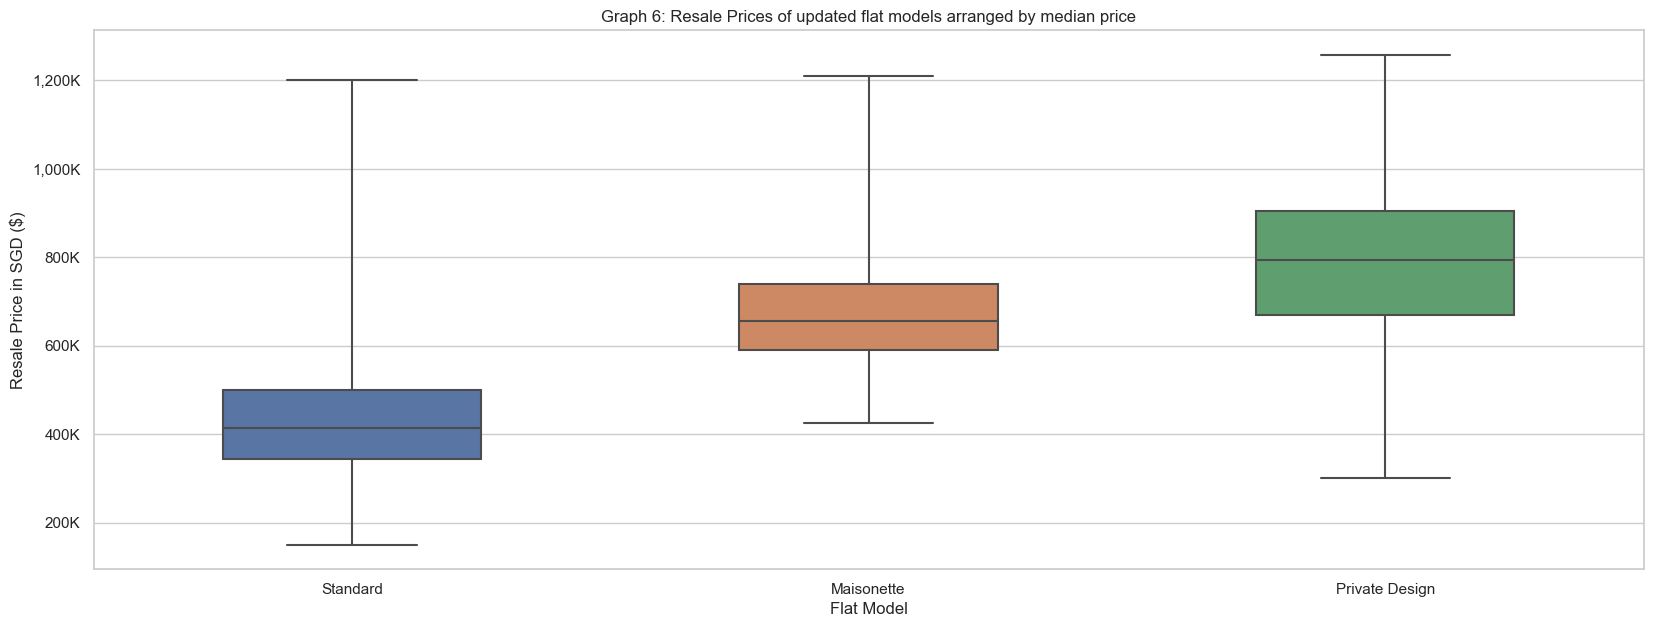

In [92]:
# set size of plot
plt.figure(figsize = (20,7))

# set order of plot - arranged the categories by median price
order_group = train.groupby("model_category")["resale_price"].median().sort_values().reset_index()["model_category"].tolist()
p = sns.boxplot(x = "model_category", y = "resale_price", data = train, width = 0.5, order = order_group, whis = (0,100))

# setting the resale price labels on the y-axis 
ylabels = ["{:,.0f}".format(x) + "K" for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)

# setting the x-axis label rotation
plt.xticks

# set title for graph, both axes label
plt.xlabel("Flat Model")
plt.ylabel("Resale Price in SGD ($)")
plt.title("Graph 6: Resale Prices of updated flat models arranged by median price") # change to your own title
plt.show();


## 6. Conclusion of recommendations
1. Top considerations are regions and maturity of the estate that the HDB unit is located in


2. Followed by the unit specifications of flat type, flat model, floor area


3. Personal preferences


However, since HDB units are still under purview of public housing policy and the resale market is subject to policy changes and circumstances, buyers will have to keep these in mind.


## 7. Sources of information for further research
1. [Mature vs Non mature towns in Singapore](https://www.hdb.gov.sg/-/media/doc/CCG/20082023-Annexes/Annex-A1.ashx)
2. [Town areas segregated by HDB](https://www.hdb.gov.sg/about-us/history/hdb-towns-your-home)
3. [Summary of cooling measures on HDB prices](https://www.businesstimes.com.sg/property/mobile-spotlight/summary-singapores-property-cooling-measures-1996-present-day)
4. [Effect of cooling measures on HDB prices in 2013 and 2018](https://www.channelnewsasia.com/singapore/property-cooling-measures-hdb-resale-prices-2013-2018-each-singapore-town-2385831)
5. [Ethnic Quota effect on selling and buying HDB](https://www.propertyguru.com.sg/property-guides/how-the-ethnic-quota-can-affect-your-sellingbuying-ability-6747)
6. [Living with noise pollution: Serangoon, Bukit Timah and Clementi among the noisiest neighbourhoods in Singapore](https://www.straitstimes.com/singapore/housing/sounds-awful-cant-sleep-cant-talk-because-of-noise)
7. [Outside noise could affect home prices](https://cos.sg/blog-post/outside-noise-could-affect-home-prices/)